<a href="https://colab.research.google.com/github/christinacdl/Text_Classification_Transformers/blob/main/Text_Classification_Offensive__Language_Detection__Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OFFENSIVE LANGUAGE DETECTION IN TWEETS USING MACHINE LEARNING METHODS**

**National and Kapodistrian University of Athens**

**Department of Informatics and Telecommunications**

**Program of Postgraduate Studies: Language Technology**

**Master's Thesis**

**Christodoulou Christina**




## **ABSTRACT**
---

Undoubtedly, offensive language has become ubiquitous in social media over the last years due to the increasing popularity of social media platforms. The growing number of users that tend to post offensive content targeting individuals or groups has led to significant repercussions not only for the well-being of the targets, but also for society itself. This has raised concern in governments, social media companies as well as academic and social communities, who have made concerted efforts to curb the dissemination of offensive language online and create a safer digital space. Nevertheless, despite their endeavors, the need to rapidly process huge amounts of content in order to detect and report offensive language has made the development of machine learning systems more than imperative. Consequently, in the present thesis, three different machine learning models, which perform binary text classification, are introduced to detect offensive language in English texts from Twitter. The proposed models, which constitute two simple classifiers and a Bidirectional Stacked LSTM, utilize contextual embeddings pooled from BERT-LARGE-Uncased by fine-tuning its various layers on four training datasets combined in one. The data preparation process involved data cleaning and preprocessing as well as data down-sampling to handle class imbalance. The effectiveness of the proposed methods is evaluated on two available test sets, OLID 2019 and OLID 2020, based on six metrics, the learning curves of loss and accuracy as well. Comparative analysis between those methods demonstrates that the concatenation of the last four hidden layers of BERT fed in a classifier outperforms the other models by achieving 77.8% and 86.8% Macro-F1 scores in the two test sets respectively. Comparison with previous related methods indicates that, although the results are satisfactory, there is room for further experimentation and improvement in the future. 


**KEYWORDS:**

Offensive Language Detection, Machine Learning, Deep Learning, Natural Language Processing, NLP, Text Classification, Twitter, Social Media 


In [1]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
'''
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import sys

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
'''

#drive.mount('/content/drive')
#sys.path.insert(0,'/content/drive/MyDrive/ColabNotebooks/THESIS')

'\n!pip install -U -q PyDrive\nfrom pydrive.auth import GoogleAuth\nfrom pydrive.drive import GoogleDrive\nfrom google.colab import auth\nfrom oauth2client.client import GoogleCredentials\nfrom google.colab import drive\nimport sys\n\n# Authenticate and create the PyDrive client.\n# This only needs to be done once per notebook.\nauth.authenticate_user()\ngauth = GoogleAuth()\ngauth.credentials = GoogleCredentials.get_application_default()\ndrive = GoogleDrive(gauth)\n'

In [2]:
!pip install  transformers contractions torch lightning emoji unidecode ekphrasis -U SentencePiece focal_loss_torch pytorch_metric_learning flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.8/355.8 kB 43.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 

In [3]:
# Import necessary libraries
import argparse
import torch
from torchtext import data, datasets
import random
import re 
import glob 
import spacy
import string 
import time
import emoji
import pandas as pd  
import seaborn as sns
import math
import numpy as np
import nltk
from tqdm import tqdm, trange
import datetime
import torch.nn as nn
from lightning import Fabric
import torch.optim as optim
import collections
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,  matthews_corrcoef
from sklearn.metrics import classification_report
from functools import reduce
import os
import shutil
import copy
from bs4 import BeautifulSoup
import itertools
from unidecode import unidecode
from collections import OrderedDict
from unidecode import unidecode
from sklearn.model_selection import train_test_split
from nltk.tokenize import TweetTokenizer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from torch.utils.data import Dataset, DataLoader, SequentialSampler, RandomSampler 
from transformers import AdamW, AutoConfig, AutoModel, get_linear_schedule_with_warmup, BertTokenizer, DebertaV2ForSequenceClassification, BertModel,BertConfig,DebertaV2Config, DebertaV2Model,  AlbertConfig, AlbertModel, AlbertTokenizer, RobertaModel, RobertaTokenizer, RobertaConfig, DebertaConfig, DebertaModel, DebertaTokenizer, AutoTokenizer, DebertaV2Tokenizer
import matplotlib.pyplot as plt 
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from focal_loss.focal_loss import FocalLoss
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import StratifiedKFold
import torchvision
from typing import Callable
from collections import Counter
from pytorch_metric_learning import losses
from huggingface_hub import notebook_login
import contractions
from datasets import load_dataset

In [4]:
torch.cuda.empty_cache()
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from small pool |      0 B   |      0 B   |      0 B   |      0 B   |\n|---------------------------------------------------------------------------|\n| Active memory         |      0 B   |      0 B   |      0 B   |      0 B   |\n|       from large pool |      0 B   |      0 B   |

In [5]:
# Set up GPU for Training
if torch.cuda.is_available():       
  device = torch.device('cuda')
  print(f'There are {torch.cuda.device_count()} GPU(s) available.')
  print('Device name:', torch.cuda.get_device_name(0))
else:
  print('No GPU available, using the CPU instead.')
  device = torch.device('cpu')

# Set Fabric device
torch.set_float32_matmul_precision('high')
fabric = Fabric(accelerator = 'cuda', devices = 1 if torch.cuda.is_available() else None, strategy='auto', precision='16-mixed')
fabric.launch()

INFO: Using 16-bit Automatic Mixed Precision (AMP)
INFO:lightning.pytorch.utilities.rank_zero:Using 16-bit Automatic Mixed Precision (AMP)


There are 1 GPU(s) available.
Device name: NVIDIA A100-SXM4-40GB


**THE LABELS**

In [6]:
# Determine the number of labels in the data and map each of these labels to an index. There are 2 labels: Not Offensive (NOT) and Offensive (OFF)
labels_2_id = {'NOT': 0 ,'OFF': 1}
id_2_labels = {0 : 'NOT', 1: 'OFF'}
print(labels_2_id)
print(id_2_labels)

{'NOT': 0, 'OFF': 1}
{0: 'NOT', 1: 'OFF'}


**FUNCTIONS USED**

In [7]:
# A function that sets seed for reproducibility
def set_seed(seed_value): 
  random.seed(seed_value)
  np.random.seed(seed_value)
  torch.manual_seed(seed_value)
  torch.cuda.manual_seed_all(seed_value)


# A function that calculates time in seconds and returns a string in the form hh:mm:ss
def calculate_time(elapsed_time):  
    # Round to the nearest second
    elapsed_rounded = int(round((elapsed_time)))  
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


# A function that calculates the trainable parameters of the model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


# A function that checks if a directory exists else creates the directory 
def check_create_path(path): 
  if not os.path.exists(path):
    os.makedirs(path)
    print('Directory created at {}'.format(path))
  else:
    print('Directory {} already exists!'.format(path))


# A function that reads a csv or tsv file
def read_a_file(filename):
  # Check first whether a certain file or directory exists
  if os.path.exists(filename):
    print('Current file opened: ',[os.path.join(filename, file) for file in glob.glob(filename)])
      
    # Find the file extension to open it properly
    find_separator = {'.csv': ',', '.tsv': '\t'}
    basename, format = os.path.splitext(filename)
    assert format in find_separator
    separator = find_separator[format]  
    
    # Read different extensions of files using pandas with 2 different separators     
    read_file = pd.read_csv(filename, sep = separator, encoding = 'utf-8')
    
    return read_file
    
  else:
    print('File or directory not accessible. Please check the filename and ensure that the entered path of the file is in "tsv" or "csv" form.')


# A function that opens and reads a dataset either from Hugging Face or from a local directory
def open_dataset(dataset_path, text_column, label_column, huggingface_dataset = True, type_split = 1, labelled_dataset = True, preprocess = True):

  if huggingface_dataset:
    if type_split == 1:
      dataset = load_dataset(dataset_path, split='train')
      read_file = pd.DataFrame(dataset)
    elif type_split == 2:
      dataset = load_dataset(dataset_path, split='validation')
      read_file = pd.DataFrame(dataset)
    elif type_split == 3:
      dataset = load_dataset(dataset_path, split='test')
      read_file = pd.DataFrame(dataset)
    else:
      print('Please specify the number "1" for train set, "2" for validation and "3" to use the test set.')
            
  else:
    read_file = read_a_file(dataset_path)
    
  read_file.info()
    
  # Get the keys and their corresponding number of values
  keys = read_file.keys() 
  for key in keys:
    df_len = len(read_file[key].unique()) # the length of the unique values of each column
    print('{0:25}{1:10}'.format(key,df_len))
    
  # Remove missing values and keep the dataFrame with valid entries in the same variable
  read_file.dropna(inplace = True) 
          
  # Remove the index
  read_file.reset_index(inplace = True, drop = True)
    
  if text_column != 'text':
    read_file = read_file.rename({text_column:'text'}, axis = 1)
  else:
    read_file
        
  if label_column != 'label':
    read_file = read_file.rename({label_column:'label'}, axis = 1)
  else:
    read_file
    
  print(read_file.label.value_counts())

  if preprocess:
    print('Applying text preprocessing...')
    read_file.text = read_file.text.apply(lambda x: preprocessing(x))
  else:
    None
      
  if labelled_dataset:
    # Encode the concatenated data
    encoded_texts = [tokenizer.encode(sent, add_special_tokens = True) for sent in read_file.text.values]
    
    # Find the maximum length
    max_len = max([len(sent) for sent in encoded_texts])
    print('Maximum sentence length: ', max_len)
    
    # Find the minimum length
    min_len = min([len(sent) for sent in encoded_texts])
    print('Minimum sentence length: ', min_len)
      
  else:
    None 
    
  return read_file

In [8]:
# MY FUNCTIONS FOR DATA PREPROCESSING

def emojis_into_text(sentence):
  demojized_sent = emoji.demojize(sentence)
  emoji_txt = re.sub(r':[\S]+:', lambda x: x.group().replace('_', ' ').replace('-', ' ').replace(':', ''), demojized_sent)
  return emoji_txt 


text_processor = TextPreProcessor(
    # terms that will be normalized
    #normalize = ['user'],
    
    # terms that will be annotated
    annotate = {'hashtag'},  #{'allcaps', 'repeated', 'elongated'}, 
    
    # corpus from which the word statistics are going to be used for word segmentation 
    segmenter = 'twitter',  # or 'english'
    
    # corpus from which the word statistics are going to be used for spell correction
    corrector = 'twitter',  # or 'english'

    fix_html = True,              # fix HTML tokens
    fix_text = True,              # fix text
    unpack_hashtags = True,       # perform word segmentation on hashtags
    unpack_contractions = False,  # Unpack contractions (can't -> can not)
    spell_correct_elong = True,   # spell correction for elongated words
    
    tokenizer = SocialTokenizer(lowercase = True).tokenize)


def preprocessing(text):
 
  try:   # Remove the UTF-8 BOM (Byte Order Mark)
    text = text.decode('utf-8-sig').replace(u'\ufffd', '?') # The UTF-8 BOM is a sequence of bytes (EF BB BF) that allows the reader to identify a file as being encoded in UTF-8
  except:
    text = text
  
  # HTML encoding
  soup = BeautifulSoup(text,'lxml') #HTML encoding has not been converted to text, and ended up in text field as ‘&amp’,’&quot’,etc.
  text = soup.get_text()    
  
  # Replace the RT with whitespace 
  text = re.sub('RT @\w+: ','', text)
  
  #Remove the @user tags  
  text = re.sub(r'@[A-Za-z0-9_]+','', text)
  
  # Remove the url links
  text = re.sub(r'http\S+', '', text)
   
  # Convert the emojis into their textual representation
  text = emojis_into_text(text)
    
  # Replace '&amp;' with 'and'
  text = re.sub(r'&amp;','and', text)
  text = re.sub(r'&','and', text)

  # Replace the unicode apostrophe 
  text = re.sub(r"’","'", text)

  text = contractions.fix(text)

  # Remove the 'url' and 'html' word
  url_words = ['url', 'URL', 'html', 'HTML', 'http', 'HTTP']   
  for u in url_words:  
    text = re.sub(u,'', text)
  
  # Replace consecutive non-ASCII characters with whitespace
  text = re.sub(r'[^\x00-\x7F]+',' ', text)     

  # Remove the extra whitespace 
  text = re.sub(r'\s+', ' ', text)

  # Apply the text processor from ekphrasis library
  text = " ".join(text_processor.pre_process_doc(text))

  text = re.sub(r'rt',' ', text)

  # Remove the extra whitespace 
  text = re.sub(r'\s+', ' ', text)
 
  return text


# Reads in file and returns a list of curse words
def read_csv_curse_words():
  curse_words = []
  f = open('/content/drive/MyDrive/ColabNotebooks/THESIS/noswearingclean.csv', 'r')
  translator = str.maketrans('', '', string.punctuation)
  for line in f:
    line = line.strip()
    line = line.split(",")
    word = line[0].translate(translator)
    curse_words.append(word)
  f.close()
  return curse_words


# Binary search for list of words
def find(L, target):
  start = 0
  end = len(L) - 1
  while start <= end:
    middle = (start + end) // 2
    midpoint = L[middle]
    if midpoint > target:
      end = middle - 1
    elif midpoint < target:
      start = middle + 1
    else:
      return True
  return False


# Returns a list of regexes
def read_regex():
  re_str = []
  # Read in the lines from the regex input file.
  with open('/content/drive/MyDrive/ColabNotebooks/THESIS/regexes.txt', 'r') as f:
    for line in f:
      re_str.append(line.split('\n')[0])
  f.close()

  # From each regex string, create a tuple of the compiled regex and the dictionary-
  # accurate label (i.e., what variants caught by that regex should be treated as)
  regexes = []
  for variant in re_str:
    expr, label = variant.split(',')
    regexes.append((re.compile(expr), label.strip()))
  return regexes


# Checks if word matches a regex and returns an empty string for no match and the collapsed word for a match
def check_regex(word, regexes):
  for expr in regexes:
    if bool(re.fullmatch(expr[0], word)):
      return expr[1]
  return ""


# Reads in file and creates dataframe
def find_offensive_words(dataframe):

  # Find the file extension to open it properly
  find_separator = {'.csv': ',', '.tsv': '\t'}
  basename, format = os.path.splitext(dataframe)
  assert format in find_separator
  separator = find_separator[format]

  training_dataset = pd.read_csv(dataframe, sep = separator, encoding = 'utf-8') 
  tweets = training_dataset['text'].astype(str)
  curse_words = read_csv_curse_words()
  regex_list = read_regex()
  total_rows = training_dataset.shape[0]  # Total number of rows
  swear_dict = {}  # Dictionary of swear words
  count_vulgar_tweets = 0

  for i in range(total_rows):
    text = unidecode(tweets[i])
    text = re.sub(r'\s+', ' ', text).strip()
    vulgar = False     
    social_tokenizer = SocialTokenizer(lowercase = False).tokenize  
    words = social_tokenizer(text) 
    insert_words = copy.deepcopy(words)
    insert_idx = []

    for j in range(len(words)):
      if words[j] == '<hashtag>' or words[j] == '</hashtag>':
        pass
      else:  
        stripped_word = words[j]
        # If word is a dictionary match
        if find(curse_words, stripped_word):
          vulgar = True
            
          # Add swear words to dictionary
          if stripped_word in swear_dict:
            swear_dict[stripped_word] += 1
          else:
            swear_dict[stripped_word] = 1
      
          insert_words[j] = stripped_word      
          insert_idx.append(j)

        else:
          # If not a dictionary match, check if regex match
          regex_word = (check_regex(stripped_word, regex_list))
          
          if regex_word != '':
            vulgar = True
            insert_idx.append(j)        
            if regex_word in swear_dict:
              swear_dict[regex_word] += 1            
              insert_words[j] = regex_word               
            else:
              swear_dict[regex_word] = 1
                  
          # If not a regex match, word is not vulgar  
          else:
            insert_words[j] = stripped_word

    num_vulgar = len(insert_idx)

    if vulgar:
      count_vulgar_tweets += 1
      if num_vulgar == 1:
        insert_words.insert(insert_idx[0] + 1, '<OFF>')
      else:
        add_idx = 1
        for k in range(num_vulgar):
          insert_idx[k] += add_idx
          add_idx += 1
        for k in insert_idx:
          insert_words.insert(k, '<OFF>')
      
    training_dataset.at[i, 'text'] = ' '.join(insert_words)  
    
  word_stats_sorted = OrderedDict(sorted(swear_dict.items(), key = lambda x: x[1], reverse = True))
  word_stats_sorted = list(word_stats_sorted.items())

  print('Total number of offensive tweets: {}'.format(count_vulgar_tweets))
  print('Total number of tweets: {}'.format(total_rows))
  print('Percent offensive: {} %'.format(round((count_vulgar_tweets/total_rows) * 100, 3)))
  print('-----------------------------------------------------------------')
  print('Top 10 words')
  for i in range(10):
    print(word_stats_sorted[i][0], ':', word_stats_sorted[i][1])
 
  return training_dataset


def select_to_get_offensive_words(file_directory, search_offensive_vocab = True):

  if search_offensive_vocab:
    print('Reading the file and searching for offensive vocabulary...')
    dataset = find_offensive_words(file_directory)
  else:
    print('Reading the file...')
    dataset = read_a_file(file_directory)
  return dataset

Word statistics files not found!
Downloading... 

/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt
Reading twitter - 1grams ...


/usr/local/lib/python3.10/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [9]:
# A function that computes class weights to add to a loss function 
def compute_class_weights(classes):
  
  class_weights = compute_class_weight(class_weight = 'balanced',
                                      classes = np.unique(classes),
                                      y = classes)
  
  print(class_weights)
  return class_weights


class Imbalanced_Dataset_Sampler(torch.utils.data.sampler.Sampler):
  """Samples elements randomly from a given list of indices for imbalanced dataset
    Arguments: indices: a list of indices
               num_samples: number of samples to draw
               callback_get_label: a callback-like function which takes two arguments - dataset and index
  """

  def __init__(self, dataset, labels: list = None, indices: list = None, num_samples: int = None, callback_get_label: Callable = None):
    
    # if indices is not provided, all elements in the dataset will be considered
    self.indices = list(range(len(dataset))) if indices is None else indices

    # define custom callback
    self.callback_get_label = callback_get_label

    # if num_samples is not provided, draw 'len(indices)' samples in each iteration
    self.num_samples = len(self.indices) if num_samples is None else num_samples

    # distribution of classes in the dataset
    df = pd.DataFrame()
    df['label'] = self._get_labels(dataset) if labels is None else labels
    df.index = self.indices
    df = df.sort_index()

    label_to_count = df['label'].value_counts()

    weights = 1.0 / label_to_count[df['label']]
    self.weights = torch.DoubleTensor(weights.to_list())

  def _get_labels(self, dataset):
    if self.callback_get_label:
      return self.callback_get_label(dataset)
    elif isinstance(dataset, torch.utils.data.TensorDataset):
      return dataset.tensors[1]
    elif isinstance(dataset, torchvision.datasets.DatasetFolder):
      return dataset.samples[:][1]
    elif isinstance(dataset, torch.utils.data.Subset):
      return dataset.dataset.imgs[:][1]
    elif isinstance(dataset, torch.utils.data.Dataset):
      return dataset.label
    else:
      raise NotImplementedError

  def __iter__(self):
    return (self.indices[i] for i in torch.multinomial(self.weights, self.num_samples, replacement=True))

  def __len__(self):
    return self.num_samples

In [10]:
# A class that creates the necessary input for a pretrained model 
class Data_Preparation(torch.utils.data.Dataset):
  
  def __init__(self, text, label, tokenizer, max_len): 
    
    self.text = text
    self.label = label
    self.tokenizer = tokenizer
    self.max_len = max_len
      
  def __len__(self):  
    return len(self.text)
  
  def get_labels(self):
    return self.label

  def __getitem__(self, index): 

    text = str(self.text[index]) 
    text = " ".join(text.split())
        
    encoding = self.tokenizer.encode_plus(text = text,
                                          text_pair = None,
                                          add_special_tokens = True,     # Add [CLS] and [SEP]
                                          max_length = self.max_len,      # Max length to pad
                                          padding = 'max_length',         # Pad sentence according to max length  'max_length'
                                          truncation = True,              # Truncate the sentences
                                          return_token_type_ids = False,  # Do not return the ids of type tokens
                                          return_attention_mask = True,   # Return attention mask
                                          return_tensors = 'pt')          # Return PyTorch tensor
 
    if self.label is None:
      return {'input_ids': encoding['input_ids'].flatten(),
              'attention_mask': encoding['attention_mask'].flatten()}      
                                   
    else:
      return {'input_ids': encoding['input_ids'].flatten(),
              'attention_mask': encoding['attention_mask'].flatten(),
              'label': torch.tensor(self.label[index], dtype = torch.float)}
              
        
def create_data_loader(df, tokenizer, max_len, batch_size, shuffle, sampler = 'train'):
  
  data = Data_Preparation(text = df.text.to_numpy(),
                          label = df.label.to_numpy(),
                          tokenizer = tokenizer,
                          max_len = max_len)
                                                        
  if sampler == 'train':
    sampler = Imbalanced_Dataset_Sampler(data)   #RandomSampler(data)  
  elif sampler == 'test':
    sampler = SequentialSampler(data)
  else:
    sampler = None

  return DataLoader(data, batch_size = batch_size, pin_memory = True, sampler = sampler, shuffle = shuffle)

In [11]:
# A function that splits the data into training and validation
def data_splitting(dataframe, text_column, label_column, split_ratio):
  x_train_texts, y_val_texts, x_train_labels, y_val_labels = train_test_split(dataframe[text_column], dataframe[label_column], 
                                                                                random_state = 42, 
                                                                                test_size = split_ratio, 
                                                                                stratify = dataframe[label_column])
  print(f'Dataset split into train and validation/test sets using {split_ratio} split ratio.')
  train_df = pd.concat([x_train_texts, x_train_labels], axis = 1)
  val_df = pd.concat([y_val_texts, y_val_labels], axis = 1)
  print(f'Size of training set: {len(train_df)}')
  print(f'Size of validation/test set: {len(val_df)}')
  return train_df, val_df
  

# A function that performes K-Fold Cross Validation (Appropriate for Imbalanced datasets)    
def kfoldcross_validation(dataframe, n_folds):
  kf = StratifiedKFold(n_splits = n_folds, random_state = 42, shuffle = True)
  for train_index, val_index in kf.split(dataframe.text, dataframe.label):
    train_texts, validation_texts = dataframe.text[train_index], dataframe.text[val_index]
    train_labels, validation_labels = dataframe.label[train_index], dataframe.label[val_index]
  train_df = pd.concat([train_texts, train_labels], axis = 1)
  validation_df = pd.concat([validation_texts, validation_labels], axis = 1)
  print('Dataset split into train and validation sets using Stratified {} Fold Cross Validation.'.format(n_folds))
  return train_df, validation_df


# A function that performs data splitting and creation of dataloaders
def TextSplitDataPreparation(dataframe_1, dataframe_2, split_ratio, tokenizer, max_length, batch_size_train, batch_size_val, procedure_1 = True, split_data = True, kfold_crosval = True, make_dataloaders = True):

  if procedure_1:
 
    if split_data:
      if kfold_crosval:
        train_df, validation_df = kfoldcross_validation(dataframe_1, n_folds = 10)
      else:
        train_df, validation_df = data_splitting(dataframe_1, 'text', 'label', split_ratio = split_ratio)

      #train_df['label'] = train_df['label'].map(labels_to_id)
      #validation_df['label'] = validation_df['label'].map(labels_to_id)
      weights_classes = compute_class_weights(train_df.label)
      weights_classes = torch.tensor(weights_classes,dtype=torch.float)
      weights_classes = weights_classes.to(fabric.device)
   
      if make_dataloaders:
        train_dataloader = create_data_loader(df = train_df, tokenizer = tokenizer, max_len = max_length, batch_size = batch_size_train, shuffle = False, sampler = 'train')
        val_dataloader = create_data_loader(df = validation_df, tokenizer = tokenizer, max_len = max_length, batch_size = batch_size_val, shuffle = False, sampler = 'test') 
        print('The train and validation dataloaders are ready for training and evaluation.')
        return train_dataloader, val_dataloader, weights_classes
      else:
        return train_df, validation_df, weights_classes
    
    else:
      make_dataloaders = False
      train_dataloader = create_data_loader(df = dataframe_1, tokenizer = tokenizer, max_len = max_length, batch_size = batch_size_train, shuffle = False, sampler = 'train')
      val_dataloader = None
      print('The dataframe is not split into train and validation sets.The dataframe converted to train dataloader for training.')
  
  else:
    weights_classes = compute_class_weights(dataframe_1.label)
    weights_classes = torch.tensor(weights_classes,dtype=torch.float)
    weights_classes = weights_classes.to(fabric.device) 
    #dataframe_1['label'] = dataframe_1['label'].map(labels_to_id)
    #dataframe_2['label'] = dataframe_2['label'].map(labels_to_id)
    train_dataloader = create_data_loader(df = dataframe_1, tokenizer = tokenizer, max_len = max_length, batch_size = batch_size_train, shuffle = False, sampler = 'train')
    val_dataloader = create_data_loader(df = dataframe_2, tokenizer = tokenizer, max_len = max_length, batch_size = batch_size_val, shuffle = False, sampler = 'test') 
    print('The train and validation dataloaders are ready for training and evaluation.')
    
    return train_dataloader, val_dataloader, weights_classes

In [12]:
class Data_Preparation_Dev_Test(Dataset):
  
  def __init__(self, text, label, tokenizer, max_len):  
    self.text = text
    self.label = label
    self.tokenizer = tokenizer
    self.max_len = max_len
        
  def __len__(self):  
    return len(self.text)

  def __getitem__(self, index): 

    text = str(self.text[index])
    text = " ".join(text.split())
    
    encoding = self.tokenizer.encode_plus(text = text,
                                          text_pair = None,
                                          add_special_tokens = True,      # Add [CLS] and [SEP]
                                          max_length = self.max_len,      # Max length to pad
                                          padding = 'max_length',         # Pad sentence according to max length  'max_length'
                                          truncation = True,              # Truncate the sentences
                                          return_token_type_ids = False,  # Do not return the ids of type tokens
                                          return_attention_mask = True,   # Return attention mask
                                          return_tensors = 'pt')          # Return PyTorch tensor
  
    return {'input_ids': encoding['input_ids'].flatten(),  
            'attention_mask': encoding['attention_mask'].flatten()}
            

def create_data_loader_test(df, tokenizer, max_len, batch_size, shuffle, sampler = 'test'):
  
  data = Data_Preparation_Dev_Test(text = df.text.to_numpy(),
                                   label = df.label.to_numpy(),
                                   tokenizer = tokenizer,
                                   max_len = max_len)
                                  
  if sampler == 'test':
    sampler = SequentialSampler(data)
  else:
    sampler = None

  return DataLoader(data, batch_size = batch_size, pin_memory = True, sampler = sampler, shuffle = shuffle)


# A function that evaluates a trained model on a unlabelled development/test set
def evaluate_no_labels(model, test_dataloader):
    
  print('Predicting labels for {} test sentences...'.format(len(test_dataloader)))

  # Initialize empty list to store the predicted values
  predictions = []

  model.eval()

  for batch in tqdm(test_dataloader, desc = 'Evaluation iteration'):
    ids_inputs = batch['input_ids']
    att_masks = batch['attention_mask']
    
    # Calculation of gradient not required during evaluation 
    with torch.no_grad():  
    
      # Perform forward propagation
      outputs = model(input_ids = ids_inputs, attention_mask = att_masks)
        
    #output = (torch.argmax(outputs, dim = 1)).data.cpu().numpy()  
    #predictions.extend(output)
    predictions += torch.round(torch.sigmoid(outputs)).flatten().cpu().numpy().tolist() 
         
  df = pd.DataFrame(predictions, columns=['label'])
  
  return df


def model_evaluation_unlabelled(file, model, id_2_label, saved_filename):
  
  # Open and read the test file
  unlabelled_opened_file = read_a_file(file, labelled_dataset = True)
  # Pre-process test file
  unlabelled_opened_file.text = unlabelled_opened_file.text.apply(lambda x: preprocessing(x))
  # Create the test dataloader
  test_dataloader = create_data_loader_test(df = unlabelled_opened_file, tokenizer = tokenizer, max_len = args['max_seq_length'], batch_size = args['batch_size'], shuffle = False, sampler = 'test')
  # Get the predictions for the unlabelled test dataloader
  predicted_labels = evaluate_no_labels(model, test_dataloader)
  # Combine the ids with the predicted numerical labels
  test_set_predictions = pd.concat([unlabelled_opened_file.id, predicted_labels], axis = 1)
  # Convert the numerical labels into categorical labels
  test_set_predictions.label_pred.replace(id_2_label, inplace = True)
  # Save the file in csv form
  test_set_predictions.to_csv(saved_filename, encoding = 'utf-8', index = False, header = True, sep ='\t')
  
  return test_set_predictions, unlabelled_opened_file


# A function that evaluates a trained model
def test(model, test_dataloader):
    
  print('Predicting labels for {} test sentences...'.format(len(test_dataloader)))
  
  # Initialize empty lists to store the true values and the predicted values
  true_labels = []
  predictions = []

  model.eval()

  for batch in tqdm(test_dataloader, desc = 'Evaluation iteration'):
    ids_inputs = batch['input_ids']
    att_masks = batch['attention_mask']
    targets = batch['label']
    
    # Calculation of gradient not required during evaluation 
    with torch.no_grad():  
    
      # Perform forward propagation
      outputs= model(input_ids = ids_inputs, attention_mask = att_masks)
        
    #output = (torch.argmax(outputs, dim = 1)).data.cpu().numpy()  
    #predictions.extend(output)                                     
   
    predictions += torch.round(torch.sigmoid(outputs)).flatten().cpu().numpy().tolist() 
    true_labels += targets.flatten().cpu().numpy().tolist()
    
  # Calculate the metrics to evaluate model performance
  calculate_metrics(true_labels, predictions)
    
  df = pd.DataFrame(predictions, columns=['label'])

  return df

In [13]:
# A function that saves a pretrained model
def save_model(model, tokenizer, experiment_name, model_output_dir): 
  if not os.path.exists(model_output_dir):
    os.makedirs(model_output_dir)
  output_model_file = os.path.join(model_output_dir, experiment_name)
  model_to_save = model.module if hasattr(model, 'module') else model # Take care of distributed/parallel training
  torch.save(model_to_save.state_dict(), output_model_file)
  torch.save(model_to_save, output_model_file)
  tokenizer.save_pretrained(model_output_dir)
  #model_to_save.save_pretrained(model_output_dir)
  #print('Model saved to {} as {}'.format(model_output_dir, experiment_name))

# A function that loads a pretrained model
def load_saved_model(defined_model, experiment_name, model_output_dir):
  saved_model_path = os.path.join(model_output_dir, experiment_name)
  if experiment_name.endswith('.pth'):
    loaded_model = defined_model.load_state_dict(torch.load(saved_model_path))
    print('Model loaded successfully')
  if experiment_name.endswith('.pt'):
    loaded_model  = torch.load(saved_model_path)
    print('Model loaded successfully') 
  else:
    print('No such model found.') 
  return loaded_model 

In [14]:
#=== METRICS CALCULATION ===

# Calculates the accuracy per batch, used in the train_model and evaluate_model functions 
def accuracy(preds, y_true):
  
  #pred_flat = np.argmax(preds, axis=1).flatten()
  #labels_flat = y_true.flatten()
  #acc = np.sum(pred_flat == labels_flat) / len(labels_flat)
  
  probs = torch.sigmoid(preds.unsqueeze(-1))
  soft_probs = (probs > 0.5).long()
  acc = (soft_probs.squeeze() == y_true).float().mean()
  return acc


def plot_roc_curve(true, preds): 
  fpr, tpr, threshold = metrics.roc_curve(true, preds)
  roc_auc = metrics.auc(fpr, tpr)
  lw = 2
  # Plot all ROC curves
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc='lower right')
  plt.show()


# A function that plots the confusion matrix with colors and titles 
def show_confusion_matrix(true, predicted, class_names):
  cm = confusion_matrix(true, predicted) #, normalize='all'
  df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
  ax = sns.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.2%', cmap='Blues', cbar=False)
  ax.set_title('Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  # Ticket labels - List must be in alphabetical order
  ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right')
  ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), rotation=30, ha='right')
  # Display the visualization of the Confusion Matrix.
  plt.show()


def show_confusion_matrix1(true, predicted, class_names):
  cm = confusion_matrix(true, predicted)
  df_cm = pd.DataFrame(cm, index = class_names, columns = class_names)
  hmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Labels')
  plt.xlabel('Predicted Labels')

  
# A function that calculates all the metrics using the validation/test set
def calculate_metrics(y_true, preds):  
  print('\nCalculating metrics...')
  assert len(preds) == len(y_true)

  # Calculate the accuracy of the model 
  acc = accuracy_score(y_true, preds)

  # Calculate the Matthews Correlation Coefficient  
  # -1 indicates total disagreement between predicted classes and actual classes
  # 0 is synonymous with completely random guessing
  # 1 indicates total agreement between predicted classes and actual classes
  mcc = matthews_corrcoef(y_true, preds)

  # Calculate model's metrics
  model_f1_score = f1_score(y_true, preds, average = 'macro', zero_division = 1)
  model_precision = precision_score(y_true, preds, average = 'macro', zero_division = 1)
  model_recall = recall_score(y_true, preds, average = 'macro', zero_division = 1)
  
  # Calculate general precision, recall, F1 score of each class
  precision, recall, fscore, support = score(y_true, preds, zero_division = 1)
  print('Accuracy: {}'.format(acc))
  print('F1 score: {}'.format(model_f1_score))
  print('Precision: {}'.format(model_precision))
  print('Recall : {}'.format(model_recall))
  print('Matthews Correlation Coefficient: {}'.format(mcc))
  print('\nPrecision of each class: {}'.format(precision))
  print('Recall of each class: {}'.format(recall))
  print('F1 score of each class: {}'.format(fscore))

  # Print the classification report
  class_names = ['NOT', 'OFF']
  print(classification_report(y_true, preds, target_names = class_names))
  
  # Create the confusion matrix 
  #show_confusion_matrix(y_true, preds, class_names)

  show_confusion_matrix1(y_true, preds, class_names)

  # Plot the Receiver Operating Characteristic (ROC curve)
  plot_roc_curve(y_true, preds)

**NECESSARY & IMPORTANT PARAMETERS**

In [15]:
dict_BERT_model_names = {1: 'bert-base-uncased',
                         2: 'bert-large-uncased'}
                    
dict_AlBERT_model_names = {1: 'albert-base-v1',
                           2: 'albert-base-v2',
                           3: 'albert-xlarge-v1',
                           4: 'albert-xlarge-v2',
                           5: 'albert-xxlarge-v1',
                           6: 'albert-xxlarge-v2'}

dict_RoBERTa_model_names = {1: 'roberta-base',
                            2: 'roberta-large'} 

dict_DeBERTa_model_names = {1: 'microsoft/deberta-base',
                            2: 'microsoft/deberta-large',
                            3: 'microsoft/deberta-xlarge',
                            4: 'microsoft/deberta-v2-xlarge',
                            5: 'microsoft/deberta-v2-xxlarge',
                            6: 'microsoft/deberta-v3-large'}

cell_types = {1: 'LSTM',
              2: 'GRU'}                 
                           
args = {'task_name': 'Offensive Language Detection in Tweets using Machine Learning Methods',
        'train_data_directory': '/content/drive/MyDrive/ColabNotebooks/THESIS/train_files/',
        'test_data_directory': '/content/drive/MyDrive/ColabNotebooks/THESIS/test_files/',
        'results_data_directory': '/content/drive/MyDrive/ColabNotebooks/THESIS/predictions/',
        'output_model_directory': '/content/drive/MyDrive/ColabNotebooks/THESIS/Models_dir/BERT-Classifier_1/',
        'model_type':  'other',   # Write the model's name (bert/albert/roberta)
        'model_name': str(dict_RoBERTa_model_names[2]),   # Change the index to train with the model of your choice   
        'cache_dir': 'cache/',
        'num_classes': 1,   # Binary classification      
        'cell_type': str(cell_types[1]),   # Change the index to train with the model with the RNN cell type of your choice 
        'num_layers': 2,  
        'dropout': 0.2,
        'max_seq_length': 512,   
        'data_split_ratio': 0.2,  
        'train_batch_size': 8, 
        'validation_batch_size': 10,   
        'num_train_epochs': 4,
        'warmup_steps': 0,  
        'max_grad_norm' : 1.0, 
        'weight_decay':  0.01,   # Weight decay is a form of regularization to lower the chance of overfitting 0.1
        'learning_rate': 2e-5,   # Suggested learning rates for BERT fine-tuning: 2e-5, 3e-5, 5e-5
        'adam_epsilon': 1e-8,    # The bias correction term (Default: 1e-8)
        'gradient_accumulation_steps': 2,
        'early_stopping_patience': 3,
        'seed': 42}

print('================',str(args['task_name']),'================\n')

# Get the directory names and the specific model used 
print('Output directory: ' + str(args['output_model_directory']))
print('Model Name: ' + str(args['model_name']))
args['output_specific_model_dir'] = args['output_model_directory'] + args['model_name'] + '/'
print('Output Directory: ' + str(args['output_specific_model_dir']))

# Check whether the directories exist else create them
print('\nChecking that the necessary paths exist...')
check_create_path(args['train_data_directory'])
check_create_path(args['test_data_directory'])
check_create_path(args['output_model_directory'])
check_create_path(args['results_data_directory'])
check_create_path(args['output_specific_model_dir'])


MODEL_CLASSES = {'BERT': (BertConfig, BertModel, BertTokenizer),
                 'AlBERT': (AlbertConfig, AlbertModel, AlbertTokenizer),
                 'RoBERTa': (RobertaConfig, RobertaModel, RobertaTokenizer),
                 'DeBERTa': (DebertaConfig, DebertaModel, DebertaTokenizer),
                 'DeBERTaV2': (DebertaV2Config, DebertaV2Model, DebertaV2Tokenizer),
                 'other': (AutoConfig, AutoModel, AutoTokenizer)} 

config_class, model_class, tokenizer_class = MODEL_CLASSES[args['model_type']]

================ Offensive Language Detection in Tweets using Machine Learning Methods ================

Output directory: /content/drive/MyDrive/ColabNotebooks/THESIS/Models_dir/BERT-Classifier_1/
Model Name: roberta-large
Output Directory: /content/drive/MyDrive/ColabNotebooks/THESIS/Models_dir/BERT-Classifier_1/roberta-large/

Checking that the necessary paths exist...
Directory /content/drive/MyDrive/ColabNotebooks/THESIS/train_files/ already exists!
Directory /content/drive/MyDrive/ColabNotebooks/THESIS/test_files/ already exists!
Directory /content/drive/MyDrive/ColabNotebooks/THESIS/Models_dir/BERT-Classifier_1/ already exists!
Directory /content/drive/MyDrive/ColabNotebooks/THESIS/predictions/ already exists!
Directory /content/drive/MyDrive/ColabNotebooks/THESIS/Models_dir/BERT-Classifier_1/roberta-large/ already exists!


**INITIALIZE THE PRETRAINED MODEL AND ITS TOKENIZER**

In [16]:
# Set seed for reproducibility
set_seed(args['seed'])

config = config_class.from_pretrained(args['model_name'], 
                                      num_labels = args['num_classes'],                                     
                                      finetuning_task = args['task_name']) 

tokenizer = tokenizer_class.from_pretrained(args['model_name'],
                                            do_lower_case = False)

tokenizer.add_tokens(['<OFF>', '<hashtag>', '</hashtag>'], special_tokens = True)

the_pretrained_model = model_class.from_pretrained(args['model_name'], 
                                                   num_labels = args['num_classes'], # The number of output labels
                                                   output_attentions = False,        # Whether the model returns attentions weights
                                                   output_hidden_states = False)      # Whether the model returns all hidden-states

# If model is BIDIRECTIONAL_RNN_LSTM_GRU or ClassifierConcatLast4HiddenStates set output_hidden_states = True
# If model is ClassifierLastHiddenState set output_hidden_states = False

the_pretrained_model.resize_token_embeddings(len(tokenizer))                                                    

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Embedding(50268, 1024)

**LOAD AND PREPARE THE TRAIN DATASETS**

Number of duplicates in the file: 33
Number of duplicates in the file: 0
NOT    8815
OFF    4392
Name: label, dtype: int64


,text,label
0,@USER She should ask a few native Americans wh...,OFF
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF
2,Amazon is investigating Chinese employees who ...,NOT
3,"@USER Someone should'veTaken"" this piece of sh...",OFF
4,@USER @USER Obama wanted liberals &amp; illega...,NOT
5,@USER Liberals are all Kookoo !!!,OFF
6,@USER @USER Oh noes! Tough shit.,OFF
7,@USER was literally just talking about this lo...,OFF
8,@USER Buy more icecream!!!,NOT
9,@USER Canada doesn’t need another CUCK! We alr...,OFF


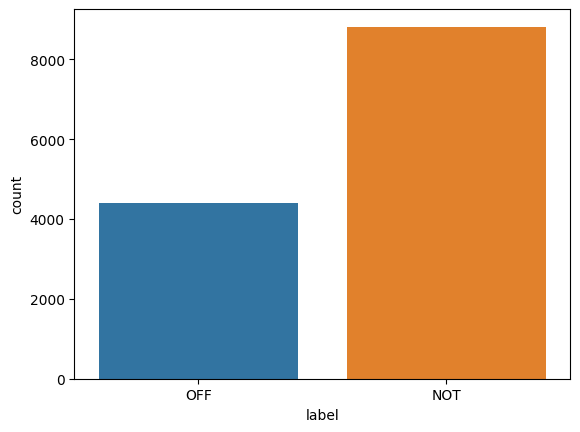

In [17]:
# NUMBER 1 (Used for training)
olid_english = pd.read_csv(args['train_data_directory'] + 'olid-training-v1.0.tsv', sep ='\t')

# Change the name of the column containing the labels
olid_english = olid_english.rename({'subtask_a': 'label'}, axis = 1)

olid_english = olid_english.rename({'tweet': 'text'}, axis = 1)

# Delete the unecessary columns
olid_english = olid_english.drop(columns=['id', 'subtask_b', 'subtask_c'], axis = 1)

print('Number of duplicates in the file:', olid_english.duplicated(subset = 'text').sum())
olid_english.drop_duplicates(subset = 'text', keep = 'first', inplace = True)
print('Number of duplicates in the file:', olid_english.duplicated(subset = 'text').sum())

print(olid_english.label.value_counts())
countplot_olid = sns.countplot(x = olid_english.label)
olid_english.head(10)

#olid_english.info()

#olid_english.to_csv('/content/drive/MyDrive/ColabNotebooks/THESIS/DATASETS/OLID_DATASET.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')

# Dataset found here: https://sites.google.com/site/offensevalsharedtask/olid

Current file opened:  ['/content/drive/MyDrive/ColabNotebooks/THESIS/train_files/labeled_data.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB
Unnamed: 0                    24783
count                             5
hate_speech                       8
offensive_language               10
neither                          10
class                             3
tweet                         24783
1    19190
2     4163
0     1430
Name: label, dtype: int64

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,NOT
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,OFF
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,OFF
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,OFF
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,OFF
5,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",OFF
6,"!!!!!!""@__BrighterDays: I can not just sit up ...",OFF
7,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,OFF
8,""" &amp; you might not get ya bitch back &amp; ...",OFF
9,""" @rhythmixx_ :hobbies include: fighting Maria...",OFF


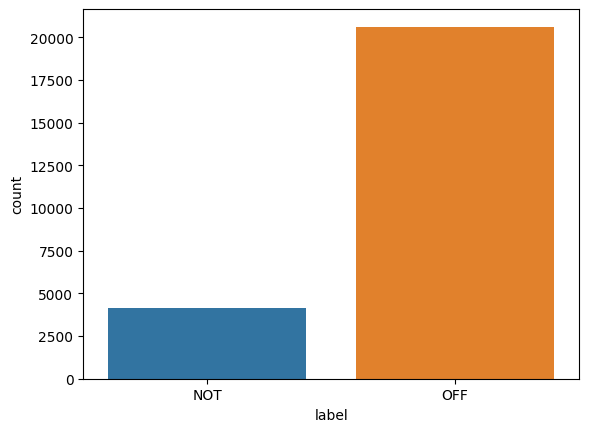

In [18]:
# NUMBER 2 (Used for training) 
kaggle_dataset = open_dataset(args['train_data_directory'] + 'labeled_data.csv', 'tweet', 'class', huggingface_dataset = False, type_split = 1, labelled_dataset = False, preprocess = False)

# Change the name of the column containing the labels and the name of the id column
kaggle_dataset = kaggle_dataset.rename({'Unnamed: 0': 'id'}, axis = 1)

kaggle_dataset = kaggle_dataset.rename({'tweet': 'text'}, axis = 1)

# Delete the unecessary columns
kaggle_dataset  = kaggle_dataset.drop(columns = ['id', 'count', 'hate_speech','offensive_language', 'neither'], axis = 1)

#kaggle_dataset['label'].replace({0: 1}, inplace = True)

# Replace the numeral labels with the respective categorical labels
kaggle_dataset['label'] = kaggle_dataset['label'].replace({0: 'OFF'})
kaggle_dataset['label'] = kaggle_dataset['label'].replace({1: 'OFF'})
kaggle_dataset['label'] = kaggle_dataset['label'].replace({2: 'NOT'})

# Change the order of the columns 
kaggle_dataset = kaggle_dataset.reindex(columns=['text', 'label'])

print('Number of duplicates in the file:', kaggle_dataset.duplicated(subset = 'text').sum())
kaggle_dataset.drop_duplicates(subset = 'text', keep = 'first', inplace = True)
print('Number of duplicates in the file:', kaggle_dataset.duplicated(subset = 'text').sum())

print(kaggle_dataset.label.value_counts())
countplot_train = sns.countplot(x = kaggle_dataset.label)
kaggle_dataset.head(10)

#kaggle_dataset.to_csv('/content/drive/MyDrive/ColabNotebooks/THESIS/DATASETS/OFF_HATE_NEITHER_Kaggle.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
# Initial dataset labels: 0 - hate speech, 1 - offensive language, 2 - neither
# Dataset found here: https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset/discussion/235251 

Current file opened:  ['/content/drive/MyDrive/ColabNotebooks/THESIS/train_files/FinalBalancedDataset.csv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB
Unnamed: 0                    56745
Toxicity                          2
tweet                         54313
0    32592
1    24153
Name: label, dtype: int64
Number of duplicates in the file: 2432
Number of duplicates in the file: 0
NOT    30389
OFF    23924
Name: label, dtype: int64


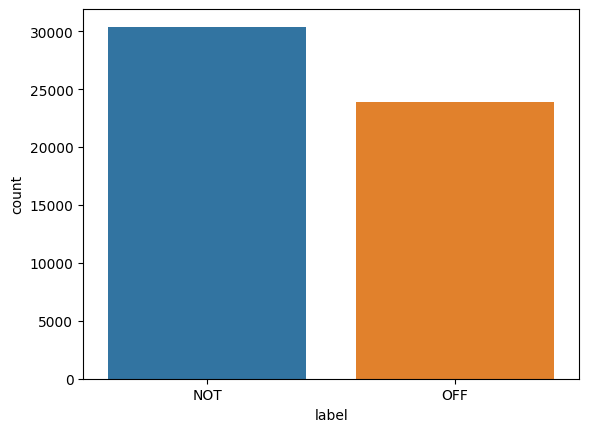

In [19]:
# NUMBER 3 (Used for training) 
english_balanced_kaggle = open_dataset(args['train_data_directory'] + 'FinalBalancedDataset.csv', 'tweet', 'Toxicity', huggingface_dataset = False, type_split = 1, labelled_dataset = False, preprocess = False)

# Change the name of the column containing the labels and the name of the id column
english_balanced_kaggle = english_balanced_kaggle.rename({'Unnamed: 0': 'id'}, axis = 1)

english_balanced_kaggle = english_balanced_kaggle.rename({'tweet': 'text'}, axis = 1)

english_balanced_kaggle  = english_balanced_kaggle.drop(columns = ['id'], axis = 1)

english_balanced_kaggle['label'] = english_balanced_kaggle['label'].replace({1: 'OFF'})
english_balanced_kaggle['label'] = english_balanced_kaggle['label'].replace({0: 'NOT'})

# Change the order of the columns
english_balanced_kaggle = english_balanced_kaggle.reindex(columns=['text', 'label'])

print('Number of duplicates in the file:', english_balanced_kaggle.duplicated(subset = 'text').sum())
english_balanced_kaggle.drop_duplicates(subset = 'text', keep = 'first', inplace = True) 
print('Number of duplicates in the file:', english_balanced_kaggle.duplicated(subset = 'text').sum())

english_balanced_kaggle.head(10)
print(english_balanced_kaggle.label.value_counts())
countplot_train_kaggle_tweets = sns.countplot(x = english_balanced_kaggle.label)

#english_balanced_kaggle.to_csv('/content/drive/MyDrive/ColabNotebooks/THESIS/DATASETS/TOXIC_TWEETS_DATASET_KAGGLE.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
# Dataset found here: https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset 

In [20]:
# Dataset found here: https://github.com/cardiffnlp/tweeteval

# It is named as 'article_english_train' below
'''
train_file = pd.read_csv('/content/train_text.txt', delimiter = '\t', header=None)
train_file.columns = ['tweet']

train_file_labels = pd.read_csv('/content/train_labels.txt', delimiter = '\t', header=None)
train_file_labels.columns = ['label']

train_dataset = pd.concat([train_file, train_file_labels], axis = 1)
train_dataset['label'] = train_dataset['label'].replace({1: 'OFF'})
train_dataset['label'] = train_dataset['label'].replace({0: 'NOT'})


val_file = pd.read_csv('/content/val_text.txt', delimiter = '\t', header=None)
val_file.columns = ['tweet']

val_file_labels = pd.read_csv('/content/val_labels.txt', delimiter = '\t', header=None)
val_file_labels.columns = ['label']

val_dataset = pd.concat([val_file, val_file_labels], axis = 1)
val_dataset['label'] = val_dataset['label'].replace({1: 'OFF'})
val_dataset['label'] = val_dataset['label'].replace({0: 'NOT'})

new_train_dataset = pd.concat([train_dataset, val_dataset], axis = 0)
new_train_dataset.to_csv('article_train_dataset.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
'''

"\ntrain_file = pd.read_csv('/content/train_text.txt', delimiter = '\t', header=None)\ntrain_file.columns = ['tweet']\n\ntrain_file_labels = pd.read_csv('/content/train_labels.txt', delimiter = '\t', header=None)\ntrain_file_labels.columns = ['label']\n\ntrain_dataset = pd.concat([train_file, train_file_labels], axis = 1)\ntrain_dataset['label'] = train_dataset['label'].replace({1: 'OFF'})\ntrain_dataset['label'] = train_dataset['label'].replace({0: 'NOT'})\n\n\nval_file = pd.read_csv('/content/val_text.txt', delimiter = '\t', header=None)\nval_file.columns = ['tweet']\n\nval_file_labels = pd.read_csv('/content/val_labels.txt', delimiter = '\t', header=None)\nval_file_labels.columns = ['label']\n\nval_dataset = pd.concat([val_file, val_file_labels], axis = 1)\nval_dataset['label'] = val_dataset['label'].replace({1: 'OFF'})\nval_dataset['label'] = val_dataset['label'].replace({0: 'NOT'})\n\nnew_train_dataset = pd.concat([train_dataset, val_dataset], axis = 0)\nnew_train_dataset.to_csv('

Current file opened:  ['/content/drive/MyDrive/ColabNotebooks/THESIS/train_files/article_train_dataset.tsv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   13240 non-null  object
 1   label   13240 non-null  object
dtypes: object(2)
memory usage: 207.0+ KB
tweet                         13202
label                             2
NOT    8840
OFF    4400
Name: label, dtype: int64
Number of duplicates in the file: 38
Number of duplicates in the file: 0
NOT    8808
OFF    4394
Name: label, dtype: int64


,text,label
0,@user Bono... who cares. Soon people will unde...,NOT
1,@user Eight years the republicans denied obama...,OFF
2,@user Get him some line help. He is gonna be j...,NOT
3,@user @user She is great. Hi Fiona!,NOT
4,@user She has become a parody unto herself? Sh...,OFF
5,@user @user @user @user @user @user @user @use...,NOT
6,@user Your looking more like a plant #maga #wa...,OFF
7,@user @user Lol. Except he’s the most successf...,NOT
8,@user Been a Willie fan since before most of y...,NOT
9,@user Here's a link to my channel with a pleth...,NOT


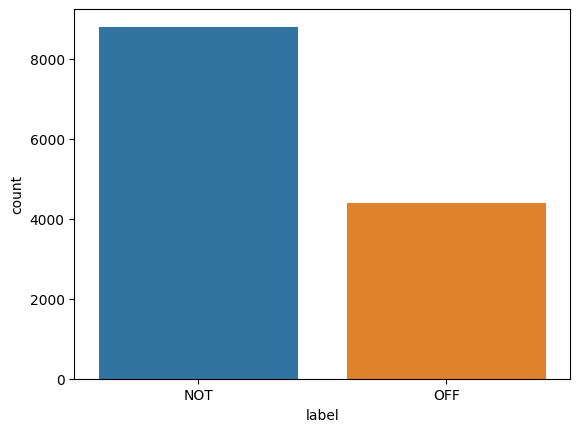

In [21]:
# NUMBER 4 (Used for training) 
article_english_train = open_dataset(args['train_data_directory'] + 'article_train_dataset.tsv', 'tweet', 'label', huggingface_dataset = False, type_split = 1, labelled_dataset = False, preprocess = False)

article_english_train = article_english_train.rename({'tweet': 'text'}, axis = 1)
article_english_train = article_english_train.reindex(columns=['text', 'label'])

print('Number of duplicates in the file:', article_english_train.duplicated(subset = 'text').sum())
article_english_train.drop_duplicates(subset = 'text', keep = 'first', inplace = True)
print('Number of duplicates in the file:', article_english_train.duplicated(subset = 'text').sum()) 

print(article_english_train.label.value_counts())
countplot_article_english_train = sns.countplot(x = article_english_train.label)

article_english_train.head(10)
#article_english_train.to_csv('/content/drive/MyDrive/ColabNotebooks/THESIS/DATASETS/OFF_NOT_TWEETEVAL.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')

**COMBINE THE DATASETS INTO ONE**

Number of duplicates in the file before dropping duplicates: 24783
Number of duplicates in the file after dropping duplicates: 0

Examples:
    Total: 80722
    Offensive (OFF-1): 32710 (40.52% of total)
    Not Offensive (NOT-0): 48012 (59.48% of total)

0    48012
1    32710
Name: label, dtype: int64


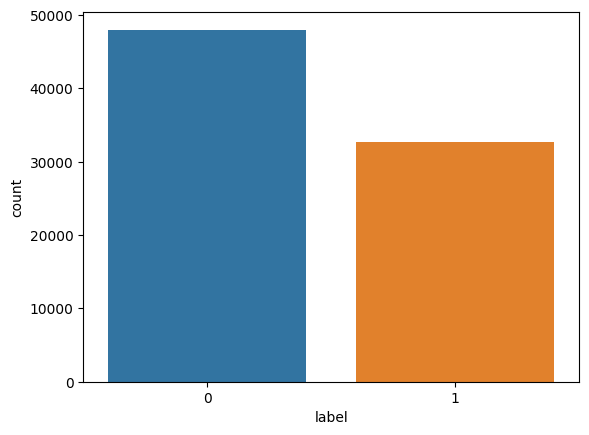

In [22]:
# Concatenate the OLID English train dataset with the other 3 datasets to create a larger dataset 
english_train_dataset = pd.concat([olid_english, kaggle_dataset, english_balanced_kaggle, article_english_train], axis = 0)

# Replace the categorical values with numeral values for training 
english_train_dataset['label'].replace(labels_2_id, inplace = True)

print('Number of duplicates in the file before dropping duplicates:', english_train_dataset.duplicated(subset = 'text').sum())   
# Remove duplicate rows
english_train_dataset.drop_duplicates(subset = 'text', keep = 'last', inplace = True) 
print('Number of duplicates in the file after dropping duplicates:', english_train_dataset.duplicated(subset = 'text').sum())

# View and verify the balanced dataset 
not_offensive_tweets, offensive_tweets = english_train_dataset.label.value_counts()
total_tweets = not_offensive_tweets + offensive_tweets
print('\nExamples:\n    Total: {}\n    Offensive (OFF-1): {} ({:.2f}% of total)\n    Not Offensive (NOT-0): {} ({:.2f}% of total)\n'.format(total_tweets, offensive_tweets, 100 * offensive_tweets / total_tweets, not_offensive_tweets, 100 * not_offensive_tweets / total_tweets))

print(english_train_dataset.label.value_counts())
countplot_train_dataset = sns.countplot(x = english_train_dataset.label) 

**BALANCE THE DATASET**

Distribution of data in classes:
0    0.594782
1    0.405218
Name: label, dtype: float64
Distribution of data in classes after resampling:
0    32710
1    32710
Name: label, dtype: int64


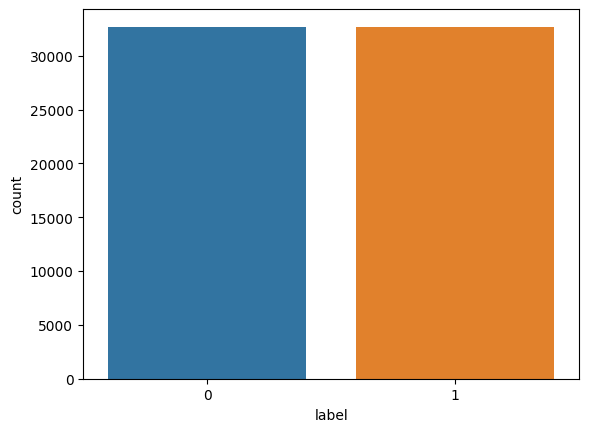

In [23]:
# Check the distribution of classes
distribution = english_train_dataset.label.value_counts()/english_train_dataset.shape[0]
print('Distribution of data in classes:')
print(distribution)

# Separate the different labels and create a combined dataset
not_offensive = english_train_dataset[english_train_dataset['label'] == 0]
offensive = english_train_dataset[english_train_dataset['label'] == 1]

# Downsample the majority class (Not Offensive) 
not_offensive_downsampled = resample(not_offensive, 
                                     replace = False,               # Sample without replacement
                                     n_samples = len(offensive),    # to match the minority class
                                     random_state = 123)            # Get reproducible results
                    
# Combine in a new dataframe the new resampled classes 
english_train_dataset_resampled = pd.concat([not_offensive_downsampled, offensive], axis = 0) 

print('Distribution of data in classes after resampling:')
print(english_train_dataset_resampled.label.value_counts())
countplot_train_dataset = sns.countplot(x = english_train_dataset_resampled.label)
# The dataset is balanced!

In [24]:
sent = "! ! ! ! as a woman you should not complain about cleaning up your house . and as a man you should always take the trash out . . ."

encoding = tokenizer.encode_plus(text = sent,
                                 text_pair = None,
                                 add_special_tokens = True,      # Add [CLS] and [SEP]
                                 max_length = 280,               # Max length to pad
                                 padding = 'max_length',         # Pad sentence according to max length  'max_length'
                                 truncation = True,              # Truncate the sentences
                                 return_token_type_ids = False,  # Do not return the ids of type tokens
                                 return_attention_mask = True,   # Return attention mask
                                 return_tensors = 'pt')  
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [25]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

280


tensor([    0,   328, 27785, 27785, 27785,    25,    10,   693,    47,   197,
           45, 11316,    59,  8143,    62,   110,   790,   479,     8,    25,
           10,   313,    47,   197,   460,   185,     5,  8875,    66,   479,
          479,   479,     2,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1, 

In [26]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

280


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

**PRE-PROCESS THE TRAINING DATASET**

In [27]:
# Apply preprocessing steps to the 'text' column of the undersampled balanced dataset
#english_train_dataset_resampled['text'] = english_train_dataset_resampled['text'].apply(lambda x: preprocessing(x))

# Divide the offensive from the not offensive tweets into different dataframes
#OFF = english_train_dataset_resampled[english_train_dataset_resampled['label'] == 1]
#NOT_OFFENSIVE_TWEETS_BALANCED = english_train_dataset_resampled[english_train_dataset_resampled['label'] == 0]

In [28]:

# Apply preprocessing steps to the 'text' column of the unbalanced dataset
english_train_dataset['text'] = english_train_dataset['text'].apply(lambda x: preprocessing(x))

# Divide the offensive from the not offensive tweets into different dataframes
OFF = english_train_dataset[english_train_dataset['label'] == 1]
NOT = english_train_dataset[english_train_dataset['label'] == 0]

# Save the divided dataframes into separate tsv files
#OFF.to_csv(args['train_data_directory'] + 'OFF_unbalanced.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
#NOT.to_csv(args['train_data_directory'] + 'NOT_balanced.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')


<ipython-input-8-ffbacb8acded>:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,'lxml') #HTML encoding has not been converted to text, and ended up in text field as ‘&amp’,’&quot’,etc.


In [29]:

OFFENSIVE_TWEETS_UNBALANCED = select_to_get_offensive_words(args['train_data_directory'] + 'OFF_unbalanced.tsv', search_offensive_vocab = True)
TRAINING_TWEETS_UNBALANCED = pd.concat([OFFENSIVE_TWEETS_UNBALANCED, NOT], axis = 0)
#TRAINING_TWEETS_UNBALANCED.to_csv(args['train_data_directory'] + 'BALANCED_TRAINING_TWEETS.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t') 


Reading the file and searching for offensive vocabulary...
Total number of offensive tweets: 19701
Total number of tweets: 32710
Percent offensive: 60.229 %
-----------------------------------------------------------------
Top 10 words
bitch : 8516
bitches : 3146
pussy : 2202
shit : 1959
hoe : 1934
ass : 1906
fuck : 1825
nigga : 1291
fucking : 905
faggot : 435


**OLID TEST 2019**

In [30]:
# Prepare OLID 2019 Test Set
'''
olid_english_test_no_labels2019 = pd.read_csv(args['test_data_directory'] + 'testset-levela.tsv', sep = '\t')
olid_english_test_labels2019 = pd.read_csv(args['test_data_directory'] + 'labels-levela.csv', sep = ',',  names=['id_remove', 'label'])

olid_english_test_with_labels2019 = pd.concat([olid_english_test_no_labels2019, olid_english_test_labels2019], axis = 1)

olid_english_test_with_labels2019 = olid_english_test_with_labels2019.drop(columns=['id_remove','id'], axis = 1)

olid_english_test_with_labels2019['label'] = olid_english_test_with_labels2019['label'].replace({'OFF': 1})
olid_english_test_with_labels2019['label'] = olid_english_test_with_labels2019['label'].replace({'NOT': 0})

olid_english_test_with_labels2019['tweet'] = olid_english_test_with_labels2019['tweet'].apply(lambda x: preprocessing(x))
olid_english_test_with_labels2019 = olid_english_test_with_labels2019.rename({'tweet': 'text'}, axis = 1)

print(olid_english_test_with_labels2019.label.value_counts())
countplot_train1 = sns.countplot(x = olid_english_test_with_labels2019.label)
 
# Divide the offensive from the not offensive tweets into different dataframes
OFF_2019 = olid_english_test_with_labels2019[olid_english_test_with_labels2019['label'] == 1]
NOT_OFFENSIVE_2019 = olid_english_test_with_labels2019[olid_english_test_with_labels2019['label'] == 0]

# Save the divided dataframes into separate tsv files
#OFF_2019.to_csv(args['test_data_directory'] + 'OFF_2019.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
#NOT_OFFENSIVE_2019.to_csv(args['test_data_directory'] + 'NOT_2019.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')

OLID_2019_OFFENSIVE = select_to_get_offensive_words(args['test_data_directory'] + 'OFF_2019.tsv', search_offensive_vocab = True)  

OLID_2019_OFF_WORDS_NOT_TEST = pd.concat([OLID_2019_OFFENSIVE, NOT_OFFENSIVE_2019], axis = 0)

# Save the  combined test dataset in tsv form for evaluation
#OLID_2019_OFF_WORDS_NOT_TEST.to_csv(args['test_data_directory'] + 'OLID_TEST_DATASET_2019.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
'''

"\nolid_english_test_no_labels2019 = pd.read_csv(args['test_data_directory'] + 'testset-levela.tsv', sep = '\t')\nolid_english_test_labels2019 = pd.read_csv(args['test_data_directory'] + 'labels-levela.csv', sep = ',',  names=['id_remove', 'label'])\n\nolid_english_test_with_labels2019 = pd.concat([olid_english_test_no_labels2019, olid_english_test_labels2019], axis = 1)\n\nolid_english_test_with_labels2019 = olid_english_test_with_labels2019.drop(columns=['id_remove','id'], axis = 1)\n\nolid_english_test_with_labels2019['label'] = olid_english_test_with_labels2019['label'].replace({'OFF': 1})\nolid_english_test_with_labels2019['label'] = olid_english_test_with_labels2019['label'].replace({'NOT': 0})\n\nolid_english_test_with_labels2019['tweet'] = olid_english_test_with_labels2019['tweet'].apply(lambda x: preprocessing(x))\nolid_english_test_with_labels2019 = olid_english_test_with_labels2019.rename({'tweet': 'text'}, axis = 1)\n\nprint(olid_english_test_with_labels2019.label.value_cou

**OLID TEST 2020**

In [31]:
# Prepare OLID 2020 Test Set
'''
olid_english_test_no_labels2020 = pd.read_csv(args['test_data_directory'] + 'test_a_tweets.tsv', sep = '\t')
olid_english_test_labels2020 = pd.read_csv(args['test_data_directory'] + 'englishA-goldlabels.csv', sep = ',',  names=['id_remove', 'label'])

olid_english_test_with_labels2020 = pd.concat([olid_english_test_no_labels2020, olid_english_test_labels2020], axis = 1)

olid_english_test_with_labels2020 = olid_english_test_with_labels2020.drop(columns=['id_remove','id'], axis = 1)

olid_english_test_with_labels2020['label'] = olid_english_test_with_labels2020['label'].replace({'OFF': 1})
olid_english_test_with_labels2020['label'] = olid_english_test_with_labels2020['label'].replace({'NOT': 0})

olid_english_test_with_labels2020['tweet'] = olid_english_test_with_labels2020['tweet'].apply(lambda x: preprocessing(x))
olid_english_test_with_labels2020 = olid_english_test_with_labels2020.rename({'tweet': 'text'}, axis = 1)

print(olid_english_test_with_labels2020.label.value_counts())
countplot_train2 = sns.countplot(x = olid_english_test_with_labels2020.label)

# Divide the offensive from the not offensive tweets into different dataframes
OFF_2020 = olid_english_test_with_labels2020[olid_english_test_with_labels2020['label'] == 1]
NOT_OFFENSIVE_2020 = olid_english_test_with_labels2020[olid_english_test_with_labels2020['label'] == 0]

# Save the divided dataframes into separate tsv files
#OFF_2020.to_csv(args['test_data_directory'] + 'OFF_2020.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
#NOT_OFFENSIVE_2020.to_csv(args['test_data_directory'] + 'NOT_2020.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')

OLID_2020_OFFENSIVE = select_to_get_offensive_words(args['test_data_directory'] + 'OFF_2020.tsv', search_offensive_vocab = True)  

OLID_2020_OFF_WORDS_NOT_TEST = pd.concat([OLID_2020_OFFENSIVE, NOT_OFFENSIVE_2020], axis = 0)

# Save the  combined test dataset in tsv form for evaluation
#OLID_2020_OFF_WORDS_NOT_TEST.to_csv(args['test_data_directory'] + 'OLID_TEST_DATASET_2020.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
'''

"\nolid_english_test_no_labels2020 = pd.read_csv(args['test_data_directory'] + 'test_a_tweets.tsv', sep = '\t')\nolid_english_test_labels2020 = pd.read_csv(args['test_data_directory'] + 'englishA-goldlabels.csv', sep = ',',  names=['id_remove', 'label'])\n\nolid_english_test_with_labels2020 = pd.concat([olid_english_test_no_labels2020, olid_english_test_labels2020], axis = 1)\n\nolid_english_test_with_labels2020 = olid_english_test_with_labels2020.drop(columns=['id_remove','id'], axis = 1)\n\nolid_english_test_with_labels2020['label'] = olid_english_test_with_labels2020['label'].replace({'OFF': 1})\nolid_english_test_with_labels2020['label'] = olid_english_test_with_labels2020['label'].replace({'NOT': 0})\n\nolid_english_test_with_labels2020['tweet'] = olid_english_test_with_labels2020['tweet'].apply(lambda x: preprocessing(x))\nolid_english_test_with_labels2020 = olid_english_test_with_labels2020.rename({'tweet': 'text'}, axis = 1)\n\nprint(olid_english_test_with_labels2020.label.valu

In [32]:
'''
# Combine the OLID 2019 and 2020 test sets and create a dataloader
test_combined_datasets_olid = pd.concat([OLID_2019_OFF_WORDS_NOT_TEST, OLID_2020_OFF_WORDS_NOT_TEST], axis = 0)
#test_combined_datasets_olid.to_csv(args['test_data_directory'] + 'test_combined_datasets_olid.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')

print(test_combined_datasets_olid.label.value_counts())
countplot_train_combined = sns.countplot(x = test_combined_datasets_olid.label)

#test_combined_datasets_olid.to_csv(args['test_data_directory'] + 'test_combined_datasets_olid.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
'''

"\n# Combine the OLID 2019 and 2020 test sets and create a dataloader\ntest_combined_datasets_olid = pd.concat([OLID_2019_OFF_WORDS_NOT_TEST, OLID_2020_OFF_WORDS_NOT_TEST], axis = 0)\n#test_combined_datasets_olid.to_csv(args['test_data_directory'] + 'test_combined_datasets_olid.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')\n\nprint(test_combined_datasets_olid.label.value_counts())\ncountplot_train_combined = sns.countplot(x = test_combined_datasets_olid.label)\n\n#test_combined_datasets_olid.to_csv(args['test_data_directory'] + 'test_combined_datasets_olid.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')\n"

In [33]:
'''
train_df, val_df = data_splitting(TRAINING_TWEETS_UNBALANCED, 'text', 'label', split_ratio = 0.2)

train_df.to_json('train.json', orient='records')
val_df.to_json('validation.json', orient='records')
test_combined_datasets_olid.to_json('test.json', orient='records')

train_df.to_csv(args['train_data_directory'] + 'train_unbalanced_Offensive_dataset.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
val_df.to_csv(args['train_data_directory'] + 'validation_unbalanced_Offensive_dataset.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')
'''

"\ntrain_df, val_df = data_splitting(TRAINING_TWEETS_UNBALANCED, 'text', 'label', split_ratio = 0.2)\n\ntrain_df.to_json('train.json', orient='records')\nval_df.to_json('validation.json', orient='records')\ntest_combined_datasets_olid.to_json('test.json', orient='records')\n\ntrain_df.to_csv(args['train_data_directory'] + 'train_unbalanced_Offensive_dataset.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')\nval_df.to_csv(args['train_data_directory'] + 'validation_unbalanced_Offensive_dataset.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')\n"

**PREPROCESSED EXAMPLES OF DATA**

In [34]:
preprocessing("#MAGA @USER 🎶 Sing like no one is listening ♥️ Love like you've never been hurt ✔️ Vote GOP when no one is watching 🙉 And don't listen to Liberals' dirt URL")

"<hashtag> maga </hashtag> musical notes sing like no one is listening hea suit love like you have never been hu check mark vote gop when no one is watching hear no evil monkey and do not listen to liberals ' di "

In [35]:
preprocessing("@USER URL url HTML html @user what bitches need to do is goto Canada 789 doesn’t doesn't need another CUCK! http://sentimentsymposium.com/")

<ipython-input-8-ffbacb8acded>:39: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text,'lxml') #HTML encoding has not been converted to text, and ended up in text field as ‘&amp’,’&quot’,etc.


'what bitches need to do is goto canada 789 does not does not need another cuck !'

In [36]:
preprocessing("!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...")

'! ! ! as a woman you should not complain about cleaning up your house . and as a man you should always take the trash out . . .'

**OPEN THE TRAIN SET**

In [37]:
training_set = open_dataset(args['train_data_directory'] + 'train_unbalanced_Offensive_dataset.tsv', 'text', 'label', huggingface_dataset = False, type_split = 1, labelled_dataset = True, preprocess = False)

validation_set = open_dataset(args['train_data_directory'] + 'validation_unbalanced_Offensive_dataset.tsv', 'text', 'label', huggingface_dataset = False, type_split = 1, labelled_dataset = True, preprocess = False)

Current file opened:  ['/content/drive/MyDrive/ColabNotebooks/THESIS/train_files/train_unbalanced_Offensive_dataset.tsv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64577 entries, 0 to 64576
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    64577 non-null  object
 1   label   64577 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1009.1+ KB
text                          55804
label                             2
0    38409
1    26168
Name: label, dtype: int64
Maximum sentence length:  419
Minimum sentence length:  3
Current file opened:  ['/content/drive/MyDrive/ColabNotebooks/THESIS/train_files/validation_unbalanced_Offensive_dataset.tsv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16145 entries, 0 to 16144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16143 non-null  object
 1   label   16145 non-null  int64 
dtypes: int64(1)

**OPEN THE TEST SETS**

In [38]:
olid_2019_test_set = open_dataset(args['test_data_directory'] + 'OLID_TEST_DATASET_2019.tsv', 'text', 'label', huggingface_dataset = False, type_split = 1, labelled_dataset = True, preprocess = False)  
olid_2020_test_set = open_dataset(args['test_data_directory'] + 'OLID_TEST_DATASET_2020.tsv', 'text', 'label', huggingface_dataset = False, type_split = 1, labelled_dataset = True, preprocess = False)
olid_combined_test_set = open_dataset(args['test_data_directory'] + 'test_combined_datasets_olid.tsv', 'text', 'label', huggingface_dataset = False, type_split = 1, labelled_dataset = True, preprocess = False)

Current file opened:  ['/content/drive/MyDrive/ColabNotebooks/THESIS/test_files/OLID_TEST_DATASET_2019.tsv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    860 non-null    object
 1   label   860 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.6+ KB
text                            849
label                             2
0    620
1    240
Name: label, dtype: int64
Maximum sentence length:  172
Minimum sentence length:  4
Current file opened:  ['/content/drive/MyDrive/ColabNotebooks/THESIS/test_files/OLID_TEST_DATASET_2020.tsv']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3887 non-null   object
 1   label   3887 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.9+ KB
text    

**SPLIT INTO TRAIN AND VALIDATIONS SETS & CREATE TRAIN AND VALIDATION DATALOADERS**

In [39]:
torch.cuda.empty_cache()
# Create the train and validation dataloaders 
train_dataloader, val_dataloader, train_class_weights = TextSplitDataPreparation(dataframe_1 = training_set, 
                                                                                 dataframe_2 = validation_set, 
                                                                                 split_ratio = args['data_split_ratio'], 
                                                                                 tokenizer = tokenizer, 
                                                                                 max_length = args['max_seq_length'], 
                                                                                 batch_size_train = args['train_batch_size'],
                                                                                 batch_size_val = args['validation_batch_size'], 
                                                                                 procedure_1 = False,
                                                                                 split_data = False,
                                                                                 kfold_crosval = False, 
                                                                                 make_dataloaders = False)
# Dataloader for OLID 2019 test set
test_olid_dataloader_2019 = create_data_loader(df = olid_2019_test_set, tokenizer = tokenizer, max_len = args['max_seq_length'], batch_size = args['validation_batch_size'], shuffle = False, sampler = 'test')

# Dataloader for OLID 2020 test set
test_olid_dataloader_2020 = create_data_loader(df = olid_2020_test_set, tokenizer = tokenizer, max_len = args['max_seq_length'], batch_size = args['validation_batch_size'], shuffle = False, sampler = 'test')

# Dataloader for OLID 2019 + 2020 test sets
test_olid_dataloader_combined = create_data_loader(df = olid_combined_test_set, tokenizer = tokenizer, max_len = args['max_seq_length'], batch_size = args['validation_batch_size'], shuffle = False, sampler = 'test')
print('Data OLID 2019 and 2020 ready for testing!')

[0.84064933 1.23389254]
The train and validation dataloaders are ready for training and evaluation.
Data OLID 2019 and 2020 ready for testing!


**INSTANTIATE MODELS**

In [40]:
class CLASSIFIER_LAST_HIDDEN_STATE(nn.Module):
    
  def __init__(self, pretrained_model, num_classes, config, dropout, freeze_bert = False):
    super(CLASSIFIER_LAST_HIDDEN_STATE, self).__init__()
    
    self.pretrained_model = pretrained_model
    self.hidden_size = config.hidden_size
    self.num_classes = num_classes  
    self.dropout = nn.Dropout(dropout)
    self.dense = nn.Linear(self.hidden_size, self.hidden_size)
    self.classifier = nn.Linear(self.hidden_size, self.num_classes)

    # Add possibility to freeze the model to avoid fine tuning params (usually leads to worse results)
    if freeze_bert:
      for param in self.pretrained_model.parameters():
        param.requires_grad = False
    #else:
    #  for param in self.pretrained_model.parameters():
    #    param.requires_grad = True

  def forward(self, input_ids, attention_mask):

    outputs = self.pretrained_model(input_ids = input_ids, attention_mask = attention_mask)
    
    # Get the last hidden state   
    last_hidden_state = outputs[0]
    
    # Extract the last hidden state of the token `[CLS]` for the classification task
    cls_embeddings = last_hidden_state[:, 0]

    # Apply dropout
    dropout_output = self.dropout(cls_embeddings)
     
    # Feed input to classifier to compute logits
    final_output = self.classifier(dropout_output)

    #Last Hidden State Output Shape: [batch size, max seq len, hidden size]
    #CLS Embeddings Output Shape: [batch size, hidden size]
    #Final output Shape: [batch size, number of classes]

    return final_output

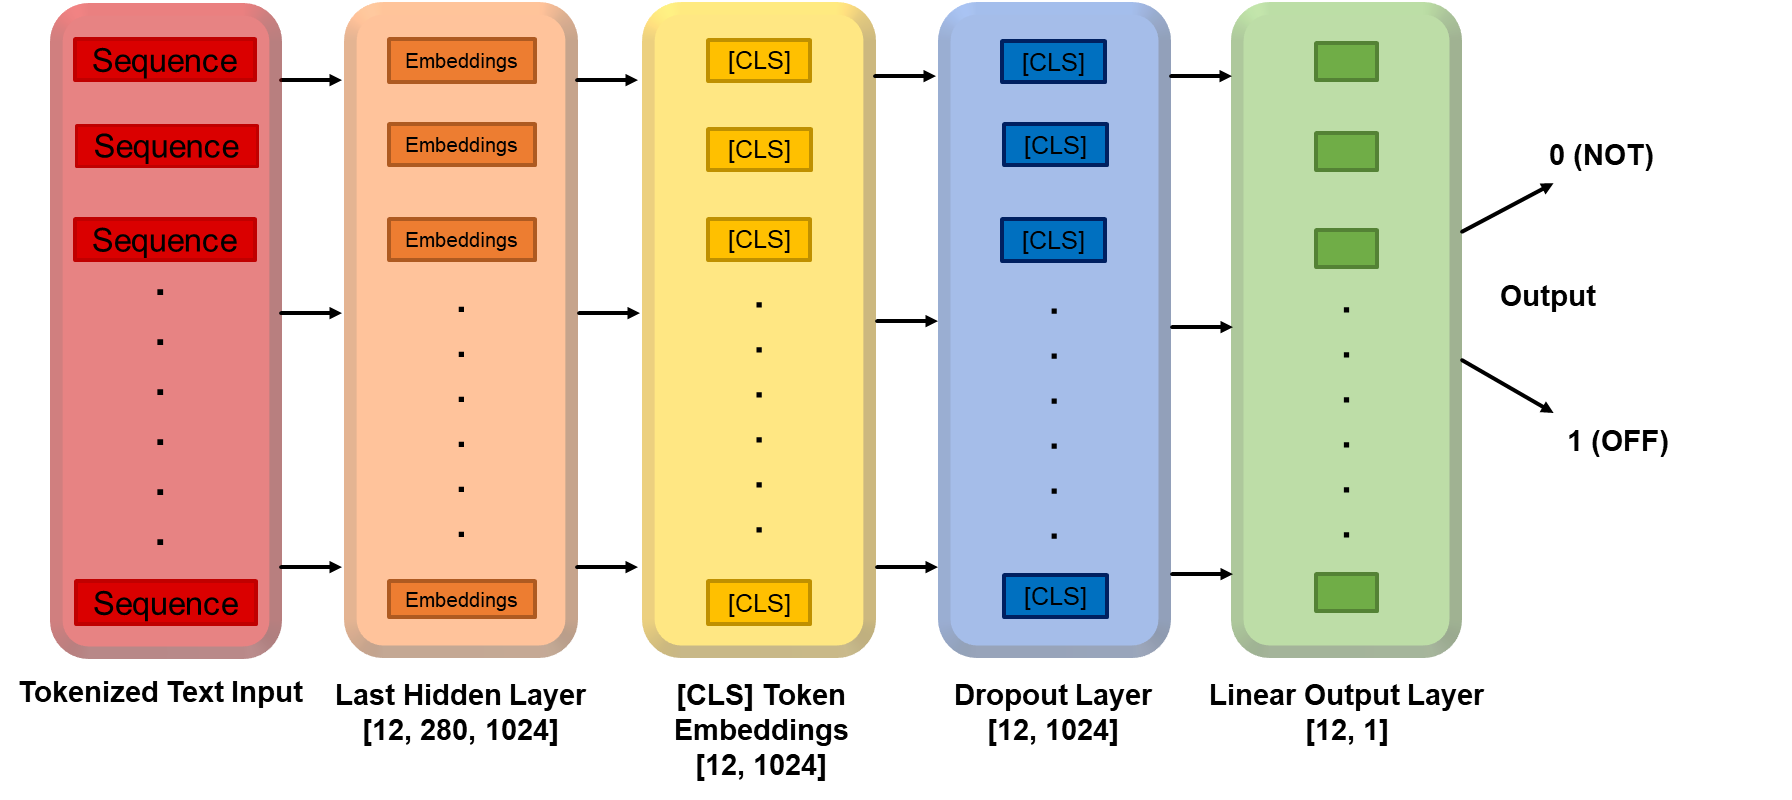

In [41]:
class CLASSIFIER_CONCAT_LAST_4_HIDDEN_STATES(nn.Module):
    
  def __init__(self, pretrained_model, num_classes, config, dropout, freeze_bert = False):
    super(CLASSIFIER_CONCAT_LAST_4_HIDDEN_STATES, self).__init__()
    
    self.pretrained_model = pretrained_model
    self.hidden_size = config.hidden_size
    self.num_classes = num_classes  
    self.dropout = nn.Dropout(dropout)
    self.classifier = nn.Linear(self.hidden_size * 4, self.num_classes)
   
    # Add possibility to freeze the model to avoid fine tuning params (usually leads to worse results)
    if freeze_bert == False:
      for param in self.pretrained_model.parameters():
        param.requires_grad = False
    else:
      for param in self.pretrained_model.parameters():
        param.requires_grad = True

  def forward(self, input_ids, attention_mask):

    outputs = self.pretrained_model(input_ids = input_ids, attention_mask = attention_mask)
    
    # Concatenate the 4 last hidden layers
    all_hidden_states = torch.stack(outputs[2])   
    concatenate_pooling = torch.cat((all_hidden_states[-1], all_hidden_states[-2], all_hidden_states[-3], all_hidden_states[-4]), dim = -1)
    last_hidden_state_cls = concatenate_pooling[:, 0] 

    # Apply dropout
    dropout_output = self.dropout(last_hidden_state_cls)

    # Feed input to classifier to compute logits
    final_output = self.classifier(dropout_output)
    
    return final_output

    #print(f'Hidden States Output Shape: {all_hidden_states.shape}') #[25, 12, 280, 1024] [initial embeddings + 24 BERT layers, batch size, max seq len, hidden size]
    #print(f'Concatenate Pooling  Output Shape: {concatenate_pooling.shape}') #[12, 280, 4096 (1024 * 4)] [batch size, max seq len, hidden size * 4]
    #print(f'CLS Output Shape: {last_hidden_state_cls.shape}') #[12, 4096] [batch size, hidden size * 4]
    #print(f'Dropout Output Shape: {dropout_output.shape}') #[12, 4096] [batch size, hidden size * 4]
    #print(f'Logits Shape: {final_output.shape}') #[12, 1] [batch size, num of classes]

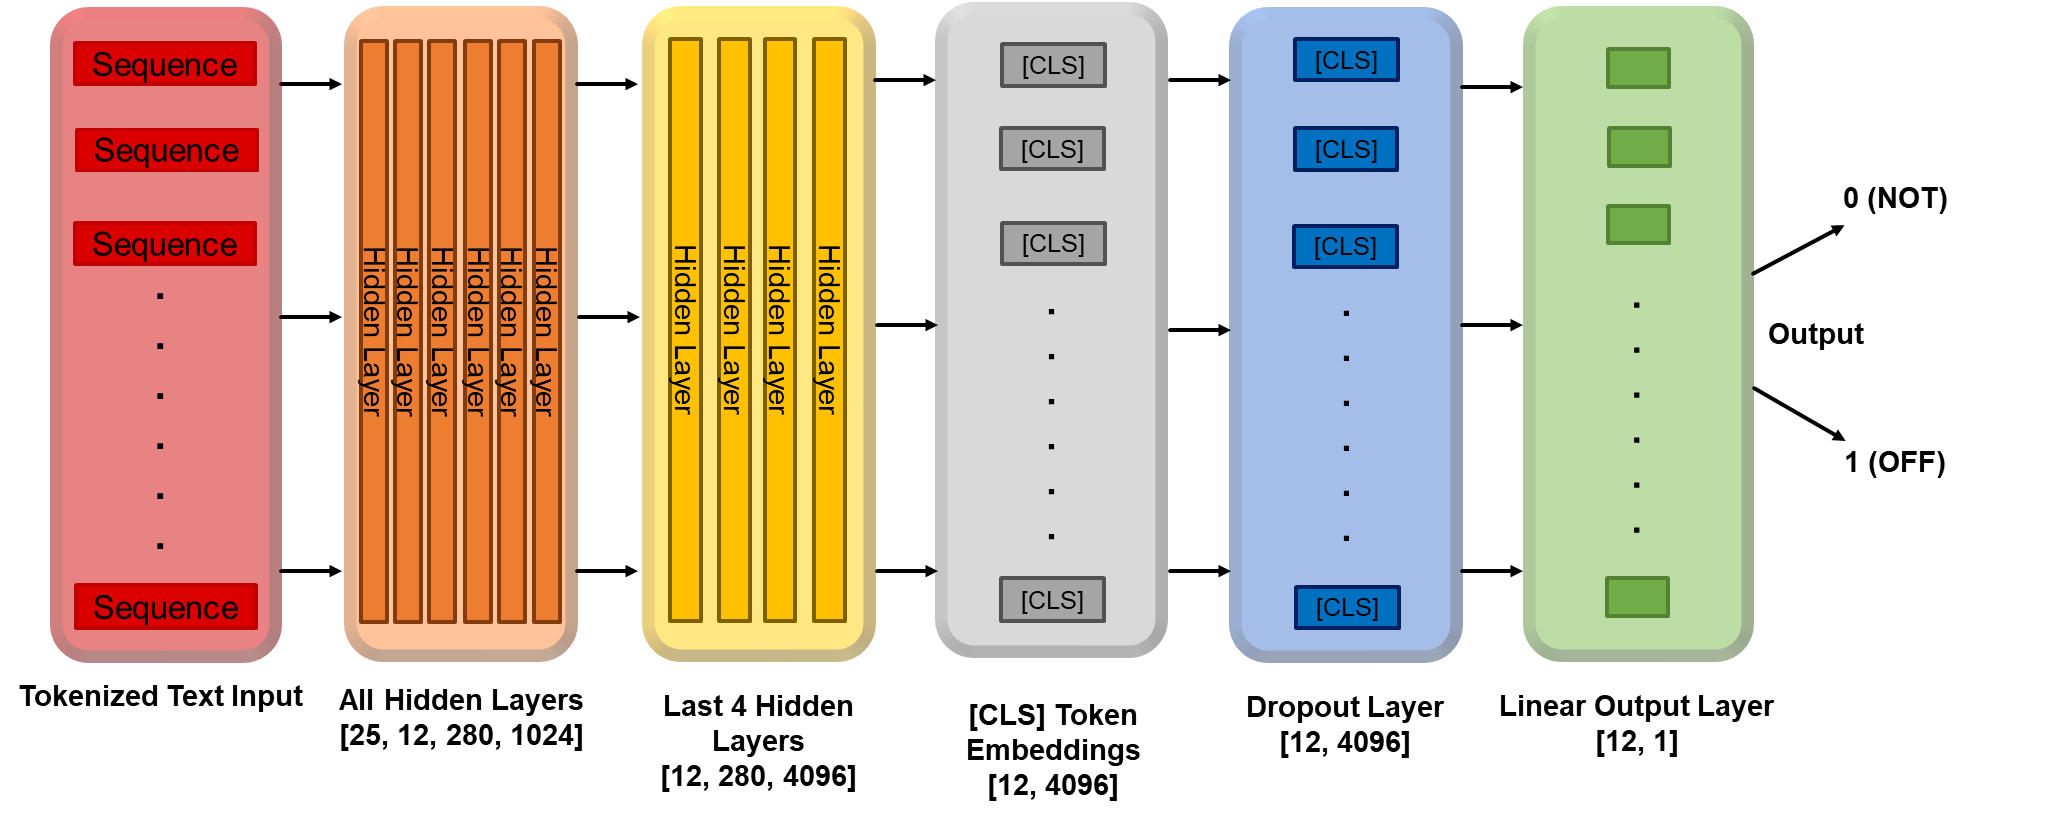

In [42]:
class BIDIRECTIONAL_RNN_LSTM_GRU(nn.Module):
  
  def __init__(self, cell_type, pretrained_model, config, num_classes, dropout, num_layers, seq_len, bidirectional, freeze_bert = False):             
    super(BIDIRECTIONAL_RNN_LSTM_GRU, self).__init__()

    cells = {'LSTM': nn.LSTM, 'GRU': nn.GRU}   

    # Initializations
    self.cell_type = cell_type
    self.pretrained_model = pretrained_model
    self.hidden_size = config.hidden_size
    self.num_layers = num_layers
    self.num_classes = num_classes
    self.dropout = dropout
    self.sequence_length = seq_len
    self.softmax = torch.nn.Softmax(dim=-1)
        
    assert cell_type in cells, 'Use one of the following: {}'.format(str(cells))
    rnn_cell = getattr(nn, cell_type)          # It fetches the constructor from torch.nn
    self.rnn = rnn_cell(
        input_size = self.embedding_size,      # Number of features for each time step        
        num_layers = self.num_layers,          # If the number of layers is bigger than 1, then it is a stacked RNN)
        hidden_size = self.sequence_length,    # Use the selected maximum sequence length needed in Bert
        batch_first = True,                    # Input and output's batch size: (batch, time_step, input_size) => 1st dimension
        bidirectional = bidirectional)         # It is a bidirectional Recurrent Neural Network (RNN)
                    
    # Initialize dropout layer for regularization
    self.dropout = nn.Dropout(dropout)

    # Final hidden state has both a forward and a backward component concatenated together
    # The size of the input to the nn.Linear layer is twice that of the hidden dimension size because it is bidirectional
    if bidirectional == True:
      self.classifier = nn.Linear(self.sequence_length * 2, self.num_classes)
    else:
      self.classifier = nn.Linear(self.sequence_length, self.num_classes)
  
    # Add possibility to freeze the model to avoid fine tuning params (usually leads to worse results)
    if freeze_bert == False:
      for param in self.pretrained_model.parameters():
        param.requires_grad = False
    else:
      for param in self.pretrained_model.parameters():
        param.requires_grad = True

    
  def forward(self, input_ids, attention_mask):
  
    outputs = self.pretrained_model(input_ids = input_ids, attention_mask = attention_mask)

    all_hidden_states = torch.stack(outputs[2])
    
    hidden_states = torch.stack([all_hidden_states[layer_i][:, 0].squeeze() for layer_i in range(1, config.num_hidden_layers+1)], dim=-1)
    hidden_states = hidden_states.view(-1, config.num_hidden_layers, self.embedding_size)

    if self.cell_type == 'LSTM':
      packed_output, _ = self.rnn(hidden_states, None) 
    if self.cell_type == 'GRU':
      packed_output, _ = self.rnn(hidden_states, None) 
    
    dropout_output = self.dropout(packed_output[:, -1, :])

    final_output = self.classifier(dropout_output)
  
    #print(f'All Hidden States Output Shape: {all_hidden_states.shape}') #[25, 12, 280, 1024] [initial embeddings + 24 BERT layers, batch size, max seq len, hidden size]
    #print(f'Hidden States Output Shape: {hidden_states.shape}') #[12, 24, 1024] [batch size, 24 BERT layers, hidden size]
    #print(f'Packed Output Shape: {packed_output.shape}') # [12 24 560] [batch size, 24 BERT layers, max seq len * 2]
    #print(f'LSTM Pooling Output Shape: {dropout_output.shape}') #[12, 560 (280 * 2)] [batch size, max seq len * 2]
    #print(f'Logits Shape: {final_output.shape}') # [12, 1] [batch size, output label shape]

    return final_output   

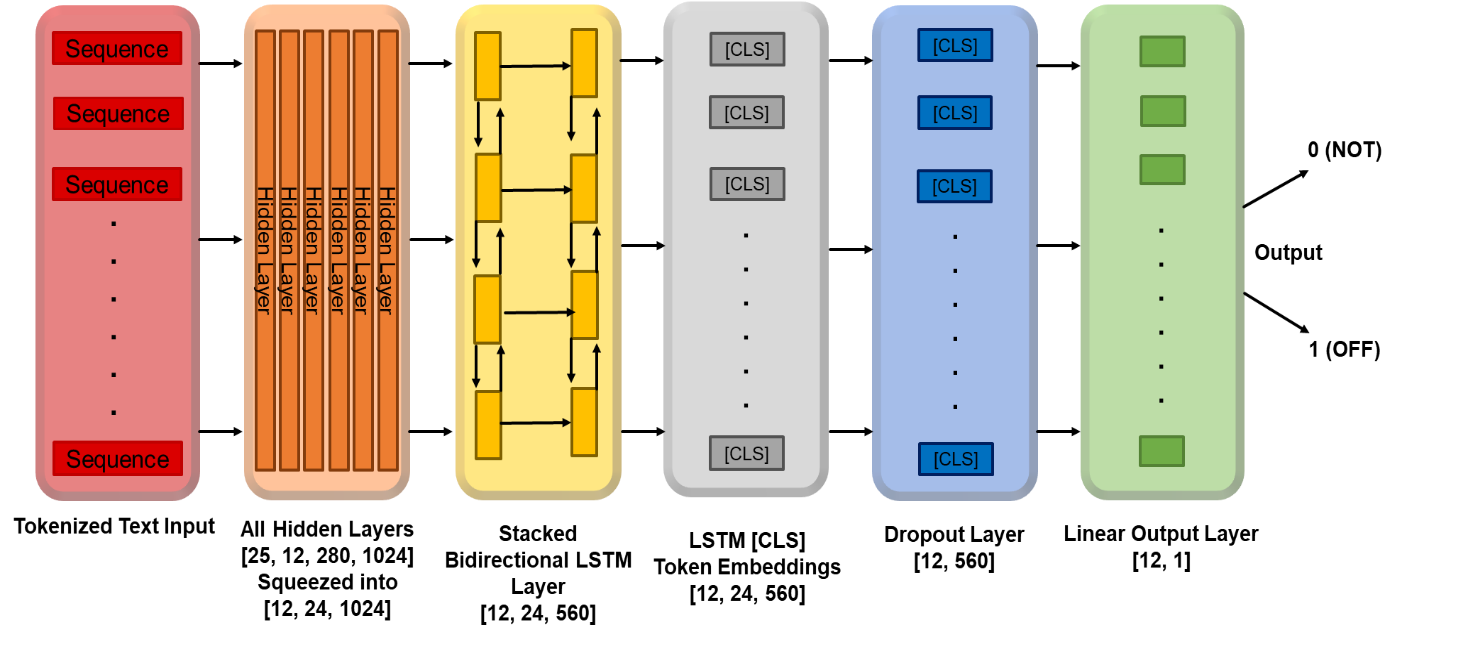

**INITIALIZE MODEL & ITS HYPERPARAMETERS**

In [43]:
# Uncomment the model you want to use

# Initialize the Classifier with only the last hidden state
model = CLASSIFIER_LAST_HIDDEN_STATE(pretrained_model = the_pretrained_model, num_classes = args['num_classes'], config = config, dropout = args['dropout'], freeze_bert = False)

# Initialize the Classifier by concatenating the last 4 hidden states
#model = CLASSIFIER_CONCAT_LAST_4_HIDDEN_STATES(pretrained_model = the_pretrained_model, num_classes = args['num_classes'], config = config, dropout = args['dropout'], freeze_bert = False)

# Initialize the BERT Bi-Stacked-LSTM model 
#model = BIDIRECTIONAL_RNN_LSTM_GRU(cell_type = args['cell_type'], pretrained_model = the_pretrained_model, config = config, num_classes = args['num_classes'], dropout = args['dropout'], num_layers = args['num_layers'], seq_len = args['max_seq_length'], bidirectional = True, freeze_bert = False)

#model.to(device)

# Total number of training steps
num_train_steps = int(len(train_dataloader) * args['num_train_epochs'])

# Define the optimizer and its parameters
param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [{'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': args['weight_decay']},
                                {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}]

optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr = args['learning_rate'], eps = args['adam_epsilon'], betas=(0.9, 0.999))

# Set up the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = args['warmup_steps'], num_training_steps = num_train_steps)

# Loss functions
def loss_function(outputs, targets):  # Comment this function if you want to lose another one
  return nn.BCEWithLogitsLoss()(outputs, targets.view(-1, 1)).to(fabric.device) 

def CrossEntropy(class_wts): 
  return nn.CrossEntropyLoss(weight = class_wts)

#loss_function = CrossEntropy(train_class_weights).to(fabric.device)

model, optimizer = fabric.setup(model, optimizer, move_to_device=True)

train_dataloader, val_dataloader, test_olid_dataloader_2019, test_olid_dataloader_2020, test_olid_dataloader_combined = fabric.setup_dataloaders(train_dataloader, val_dataloader, test_olid_dataloader_2019, test_olid_dataloader_2020, test_olid_dataloader_combined)

In [44]:
print('TRAINING PARAMETERS:\n')
print('Model Name: {}'.format(str(args['model_name'])))
print('The model has {:,} trainable parameters'.format(count_parameters(model)))
print('Loss function used: BCEWithLogitsLoss')
print('Optimizer used: AdamW')
print('Learning Rate: {:.5f}'.format(args['learning_rate']))
print('Adam Epsilon: {}'.format(args['adam_epsilon']))
print('Betas: {}'.format('0.9, 0.999'))
print('Weight Decay: {}'.format(args['weight_decay']))
print('Train Batch Size: {}'.format(args['train_batch_size']))
print('Validation Batch Size: {}'.format(args['validation_batch_size']))
print('Number of training epochs: {}'.format(args['num_train_epochs']))
print('Maximum Sequence Length: {}'.format(args['max_seq_length']))
print('Bidirectional RNN Cell type: {}'.format(args['cell_type']))
print('Number of layers in the Bidirectional RNN: {}'.format(args['num_layers']))
print('Warm-up Steps: {}'.format(args['warmup_steps']))
print('Max grad Norm: {}'.format(args['max_grad_norm']))
print('Number of training steps: {}'.format(num_train_steps))
print('Dropout: {}'.format(args['dropout']))

TRAINING PARAMETERS:

Model Name: roberta-large
The model has 356,413,441 trainable parameters
Loss function used: BCEWithLogitsLoss
Optimizer used: AdamW
Learning Rate: 0.00002
Adam Epsilon: 1e-08
Betas: 0.9, 0.999
Weight Decay: 0.01
Train Batch Size: 8
Validation Batch Size: 10
Number of training epochs: 4
Maximum Sequence Length: 512
Bidirectional RNN Cell type: LSTM
Number of layers in the Bidirectional RNN: 2
Warm-up Steps: 0
Max grad Norm: 1.0
Number of training steps: 32292
Dropout: 0.2


**TRAIN AND EVALUATE BERT MODEL (TRAIN & VALIDATION SETS)**

In [45]:
print('Training model in {} sentences and evaluating model in {} sentences...'.format(len(train_dataloader), len(val_dataloader)))
# Store losses and accuracies
training_stats = []

# Define best_score, counter, and patience for early stopping:
best_score = None
counter = 0
patience = args['early_stopping_patience']

# Measure the total training and evaluation time
total_t0 = time.time()

for epoch in range(0, args['num_train_epochs']):
  print('\n======== EPOCH {} / {} ========\n'.format(epoch + 1, args['num_train_epochs']))
  print('TRAINING MODEL...') 
    
  # Measure how long the training epoch takes
  t0 = time.time()

  training_loss = 0
  training_acc = 0 

  model.train()
  
  for batch_idx, batch in enumerate(tqdm(train_dataloader, desc = 'Training iteration')):
    
    # Progress update every 1000 batches  
    if batch_idx % 1000 == 0 and not batch_idx == 0:  
          
      # Calculate elapsed time in minutes
      elapsed = calculate_time(time.time() - t0)
                
      # Report progress
      print(f' Batch {batch_idx} of {len(train_dataloader)} | Elapsed time: {elapsed}') 
        
    input_ids = batch['input_ids'] 
    attention_masks = batch['attention_mask'] 
    labels = batch['label']
    
    # Perform forward propagation. Compute the predictions                            
    predictions = model(input_ids = input_ids, attention_mask = attention_masks)
                                                                        
    # Compute the loss  
    loss = loss_function(predictions, labels)
    
    loss = loss/args['gradient_accumulation_steps']
    
    fabric.backward(loss)  
    
    training_loss += loss.item()

    if (batch_idx + 1) % args['gradient_accumulation_steps'] == 0:
    #torch.nn.utils.clip_grad_norm_(model.parameters(), args['max_grad_norm'])
      optimizer.step()
      #scheduler.step()
      optimizer.zero_grad()
    
    # Compute the accuracy
    accu = accuracy(predictions, labels)
    training_acc += accu.item()
    
    # Move logits and labels to CPU
    predictions = predictions.detach().cpu().numpy()
    labels = labels.to('cpu').numpy()
 
  if scheduler is not None:
    scheduler.step()
                      
  train_loss_of_epoch = training_loss / len(train_dataloader)
  train_accuracy_of_epoch = training_acc / len(train_dataloader)
          
  # Measure the epoch training time
  training_time = calculate_time(time.time() - t0)
     
  print('Training epoch time: {} | Train Loss: {:.3f}| Train Acc: {:.2f}% '.format(training_time, train_loss_of_epoch, train_accuracy_of_epoch*100))
    
  print('\nEVALUATING MODEL...')
    
  t0 = time.time()

  eval_loss = 0
  eval_acc = 0

  model.eval()
  
  for batch in tqdm(val_dataloader, desc = 'Evaluation iteration'):

    ids_inputs = batch['input_ids'] 
    att_masks = batch['attention_mask'] 
    targets = batch['label'] 
    
    # Calculation of gradient not required during evaluation 
    with torch.no_grad():  
    
      # Perform forward propagation
      outputs  = model(input_ids = ids_inputs, attention_mask = att_masks)

    val_loss = loss_function(outputs, targets)
    
    eval_loss += val_loss.item()
    
    # Compute the accuracy
    accur = accuracy(outputs, targets)
    eval_acc += accur.item()
    
    # Move logits and labels to CPU
    outputs = outputs.detach().cpu().numpy()
    targets = targets.to('cpu').numpy()

  loss_of_epoch_val = eval_loss / len(val_dataloader)
  accuracy_of_epoch_val = eval_acc / len(val_dataloader)

  # Measure the validating epoch time
  validation_time = calculate_time(time.time() - t0)

  print(f'Validation epoch time: {validation_time} | Validation Loss: {loss_of_epoch_val:.3f} | Validation Acc: {accuracy_of_epoch_val*100:.2f}%')
  
  if best_score is None:
    best_score = loss_of_epoch_val
  else:
    # Check if val_loss improves or not.
    if loss_of_epoch_val < best_score:
      # val_loss improves, we update the latest best_score, and save the current model
      best_score = loss_of_epoch_val
      #save_ckp(checkpoint, True, checkpoint_path, best_model_path)
    else:
      # val_loss does not improve, we increase the counter, stop training if it exceeds the amount of patience
      counter += 1
      if counter >= patience:
        print('EARLY STOPPING!')
        break

  # Record all statistics from each epoch
  training_stats.append({'Epoch': epoch + 1,
                         'Training Loss': train_loss_of_epoch,
                         'Validation Loss': loss_of_epoch_val,
                         'Training Accuracy': train_accuracy_of_epoch,
                         'Validation Accuracy': accuracy_of_epoch_val,
                         'Training Time': training_time,
                         'Validation Time': validation_time})
  
print('Training and evaluation process complete!')
print('Total amount of time: {}'.format(calculate_time(time.time()-total_t0)))

Training model in 8073 sentences and evaluating model in 1615 sentences...

======== EPOCH 1 / 4 ========

TRAINING MODEL...


Training iteration:  12%|█▏        | 1001/8073 [02:44<18:38,  6.32it/s]

 Batch 1000 of 8073 | Elapsed time: 0:02:45


Training iteration:  25%|██▍       | 2001/8073 [05:26<16:04,  6.30it/s]

 Batch 2000 of 8073 | Elapsed time: 0:05:26


Training iteration:  37%|███▋      | 3001/8073 [08:08<13:26,  6.29it/s]

 Batch 3000 of 8073 | Elapsed time: 0:08:08


Training iteration:  50%|████▉     | 4001/8073 [10:50<10:45,  6.31it/s]

 Batch 4000 of 8073 | Elapsed time: 0:10:51


Training iteration:  62%|██████▏   | 5001/8073 [13:32<08:08,  6.29it/s]

 Batch 5000 of 8073 | Elapsed time: 0:13:32


Training iteration:  74%|███████▍  | 6001/8073 [16:14<05:29,  6.28it/s]

 Batch 6000 of 8073 | Elapsed time: 0:16:14


Training iteration:  87%|████████▋ | 7001/8073 [18:56<02:52,  6.20it/s]

 Batch 7000 of 8073 | Elapsed time: 0:18:57


Training iteration:  99%|█████████▉| 8001/8073 [21:39<00:11,  6.31it/s]

 Batch 8000 of 8073 | Elapsed time: 0:21:39


Training iteration: 100%|██████████| 8073/8073 [21:51<00:00,  6.16it/s]


Training epoch time: 0:21:51 | Train Loss: 0.130| Train Acc: 88.21% 

EVALUATING MODEL...


Evaluation iteration: 100%|██████████| 1615/1615 [01:39<00:00, 16.27it/s]


Validation epoch time: 0:01:39 | Validation Loss: 0.224 | Validation Acc: 90.67%

======== EPOCH 2 / 4 ========

TRAINING MODEL...


Training iteration:  12%|█▏        | 1001/8073 [02:42<18:52,  6.25it/s]

 Batch 1000 of 8073 | Elapsed time: 0:02:42


Training iteration:  25%|██▍       | 2001/8073 [05:24<16:12,  6.24it/s]

 Batch 2000 of 8073 | Elapsed time: 0:05:25


Training iteration:  37%|███▋      | 3001/8073 [08:07<13:32,  6.24it/s]

 Batch 3000 of 8073 | Elapsed time: 0:08:08


Training iteration:  50%|████▉     | 4001/8073 [10:50<10:58,  6.18it/s]

 Batch 4000 of 8073 | Elapsed time: 0:10:50


Training iteration:  62%|██████▏   | 5001/8073 [13:34<08:12,  6.23it/s]

 Batch 5000 of 8073 | Elapsed time: 0:13:35


Training iteration:  74%|███████▍  | 6001/8073 [16:17<05:31,  6.26it/s]

 Batch 6000 of 8073 | Elapsed time: 0:16:17


Training iteration:  87%|████████▋ | 7001/8073 [18:59<02:50,  6.27it/s]

 Batch 7000 of 8073 | Elapsed time: 0:19:00


Training iteration:  99%|█████████▉| 8001/8073 [21:42<00:11,  6.26it/s]

 Batch 8000 of 8073 | Elapsed time: 0:21:42


Training iteration: 100%|██████████| 8073/8073 [21:53<00:00,  6.14it/s]


Training epoch time: 0:21:54 | Train Loss: 0.094| Train Acc: 92.08% 

EVALUATING MODEL...


Evaluation iteration: 100%|██████████| 1615/1615 [01:39<00:00, 16.23it/s]


Validation epoch time: 0:01:40 | Validation Loss: 0.218 | Validation Acc: 91.12%

======== EPOCH 3 / 4 ========

TRAINING MODEL...


Training iteration:  12%|█▏        | 1001/8073 [02:42<18:49,  6.26it/s]

 Batch 1000 of 8073 | Elapsed time: 0:02:43


Training iteration:  25%|██▍       | 2001/8073 [05:25<16:07,  6.28it/s]

 Batch 2000 of 8073 | Elapsed time: 0:05:25


Training iteration:  37%|███▋      | 3001/8073 [08:08<13:31,  6.25it/s]

 Batch 3000 of 8073 | Elapsed time: 0:08:08


Training iteration:  50%|████▉     | 4001/8073 [10:50<10:47,  6.29it/s]

 Batch 4000 of 8073 | Elapsed time: 0:10:51


Training iteration:  62%|██████▏   | 5001/8073 [13:33<08:10,  6.26it/s]

 Batch 5000 of 8073 | Elapsed time: 0:13:33


Training iteration:  74%|███████▍  | 6001/8073 [16:16<05:31,  6.26it/s]

 Batch 6000 of 8073 | Elapsed time: 0:16:16


Training iteration:  87%|████████▋ | 7001/8073 [18:59<02:51,  6.25it/s]

 Batch 7000 of 8073 | Elapsed time: 0:18:59


Training iteration:  99%|█████████▉| 8001/8073 [21:42<00:11,  6.23it/s]

 Batch 8000 of 8073 | Elapsed time: 0:21:42


Training iteration: 100%|██████████| 8073/8073 [21:54<00:00,  6.14it/s]


Training epoch time: 0:21:54 | Train Loss: 0.075| Train Acc: 94.20% 

EVALUATING MODEL...


Evaluation iteration: 100%|██████████| 1615/1615 [01:40<00:00, 16.09it/s]


Validation epoch time: 0:01:40 | Validation Loss: 0.269 | Validation Acc: 89.27%

======== EPOCH 4 / 4 ========

TRAINING MODEL...


Training iteration:  12%|█▏        | 1001/8073 [02:43<18:57,  6.21it/s]

 Batch 1000 of 8073 | Elapsed time: 0:02:43


Training iteration:  25%|██▍       | 2001/8073 [05:26<16:07,  6.28it/s]

 Batch 2000 of 8073 | Elapsed time: 0:05:27


Training iteration:  37%|███▋      | 3001/8073 [08:09<13:34,  6.23it/s]

 Batch 3000 of 8073 | Elapsed time: 0:08:10


Training iteration:  50%|████▉     | 4001/8073 [10:52<10:48,  6.28it/s]

 Batch 4000 of 8073 | Elapsed time: 0:10:53


Training iteration:  62%|██████▏   | 5001/8073 [13:36<08:10,  6.26it/s]

 Batch 5000 of 8073 | Elapsed time: 0:13:36


Training iteration:  74%|███████▍  | 6001/8073 [16:19<05:31,  6.25it/s]

 Batch 6000 of 8073 | Elapsed time: 0:16:19


Training iteration:  87%|████████▋ | 7001/8073 [19:02<02:51,  6.23it/s]

 Batch 7000 of 8073 | Elapsed time: 0:19:02


Training iteration:  99%|█████████▉| 8001/8073 [21:45<00:11,  6.24it/s]

 Batch 8000 of 8073 | Elapsed time: 0:21:45


Training iteration: 100%|██████████| 8073/8073 [21:56<00:00,  6.13it/s]


Training epoch time: 0:21:57 | Train Loss: 0.062| Train Acc: 95.35% 

EVALUATING MODEL...


Evaluation iteration: 100%|██████████| 1615/1615 [01:40<00:00, 16.12it/s]

Validation epoch time: 0:01:40 | Validation Loss: 0.181 | Validation Acc: 93.26%
Training and evaluation process complete!
Total amount of time: 1:34:15


**SAVE THE TRAINED MODEL**

In [46]:
save_model(model, tokenizer, 'RoBERTa_Last_Hidden.bin', args['output_specific_model_dir'])

**VIEW THE RESULTS FROM TRAINING AND VALIDATION**

In [47]:
# Create a DataFrame from our training statistics
df_stats = pd.DataFrame(data = training_stats)

# Use the 'epoch' as the row index
df_stats = df_stats.set_index('Epoch')

# Display the table
df_stats

,Training Loss,Validation Loss,Training Accuracy,Validation Accuracy,Training Time,Validation Time
Epoch,,,,,,
1,0.129921,0.223594,0.882076,0.906729,0:21:51,0:01:39
2,0.094308,0.218477,0.920816,0.911249,0:21:54,0:01:40
3,0.075239,0.269388,0.942044,0.892673,0:21:54,0:01:40
4,0.061928,0.181402,0.953456,0.932570,0:21:57,0:01:40


**PLOT ACCURACY AND LOSS LEARNING CURVES**

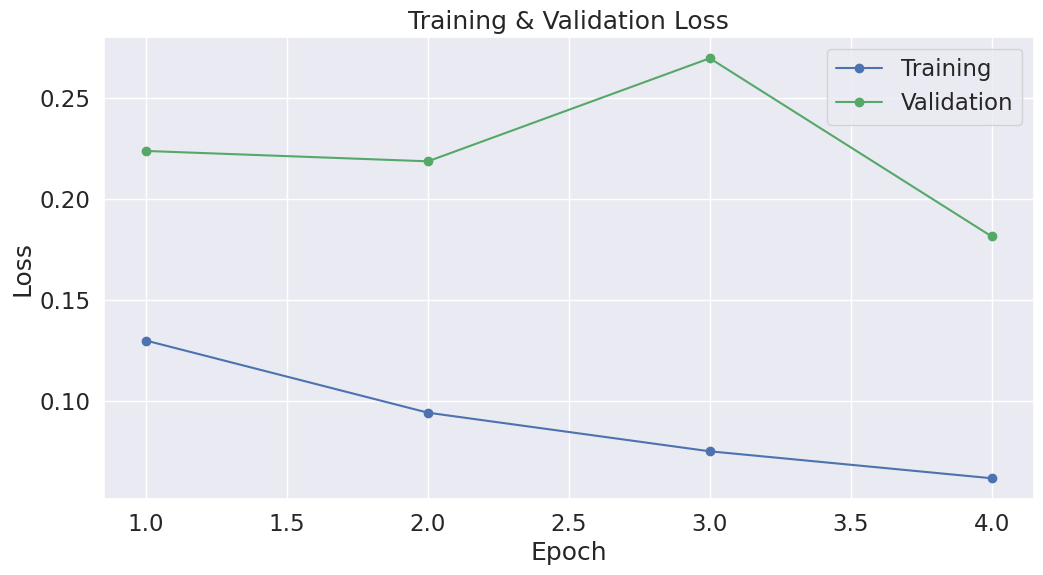

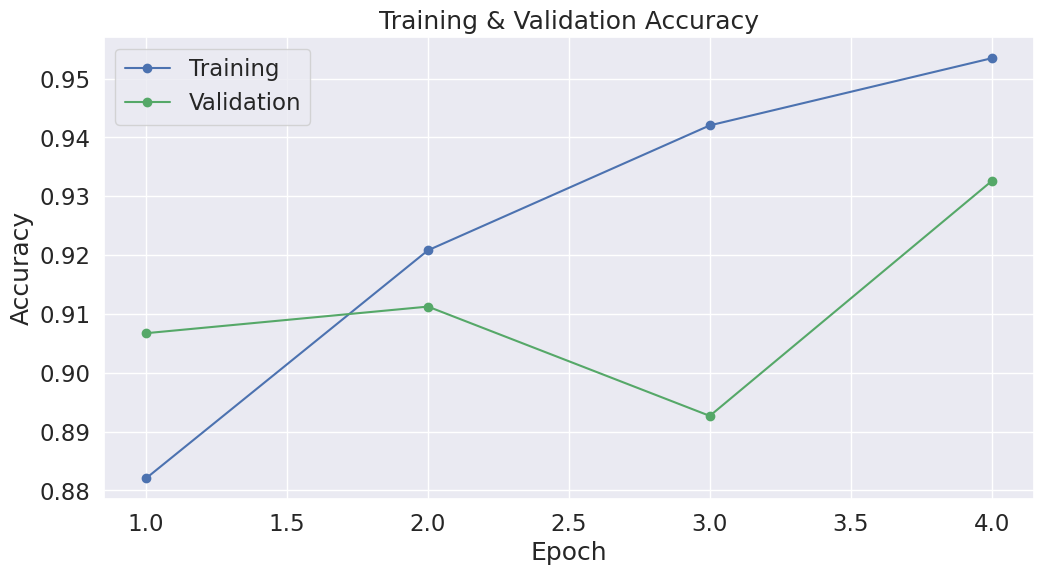

In [48]:
# Use plot styling from seaborn
sns.set(style='darkgrid')

# Increase the plot size and font size
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = (12,6)

# Plot the learning curve of loss
plt.plot(df_stats['Training Loss'], 'b-o', label='Training')
plt.plot(df_stats['Validation Loss'], 'g-o', label='Validation')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the learning curve of accuracy
plt.plot(df_stats['Training Accuracy'], 'b-o', label='Training')
plt.plot(df_stats['Validation Accuracy'], 'g-o', label='Validation')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**MODEL EVALUATION ON THE TEST SETS**

Predicting labels for 86 test sentences...


Evaluation iteration: 100%|██████████| 86/86 [00:05<00:00, 16.04it/s]



Calculating metrics...
Accuracy: 0.8302325581395349
F1 score: 0.7685376356772062
Precision: 0.806768341307815
Recall : 0.7481854838709677
Matthews Correlation Coefficient: 0.5518530573396301

Precision of each class: [0.84649123 0.76704545]
Recall of each class: [0.93387097 0.5625    ]
F1 score of each class: [0.88803681 0.64903846]
              precision    recall  f1-score   support

         NOT       0.85      0.93      0.89       620
         OFF       0.77      0.56      0.65       240

    accuracy                           0.83       860
   macro avg       0.81      0.75      0.77       860
weighted avg       0.82      0.83      0.82       860



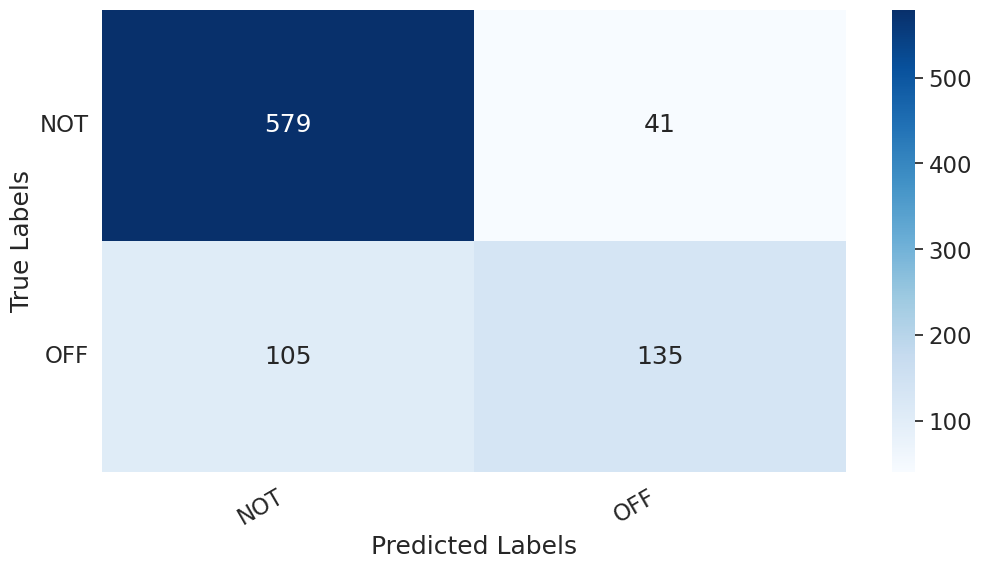

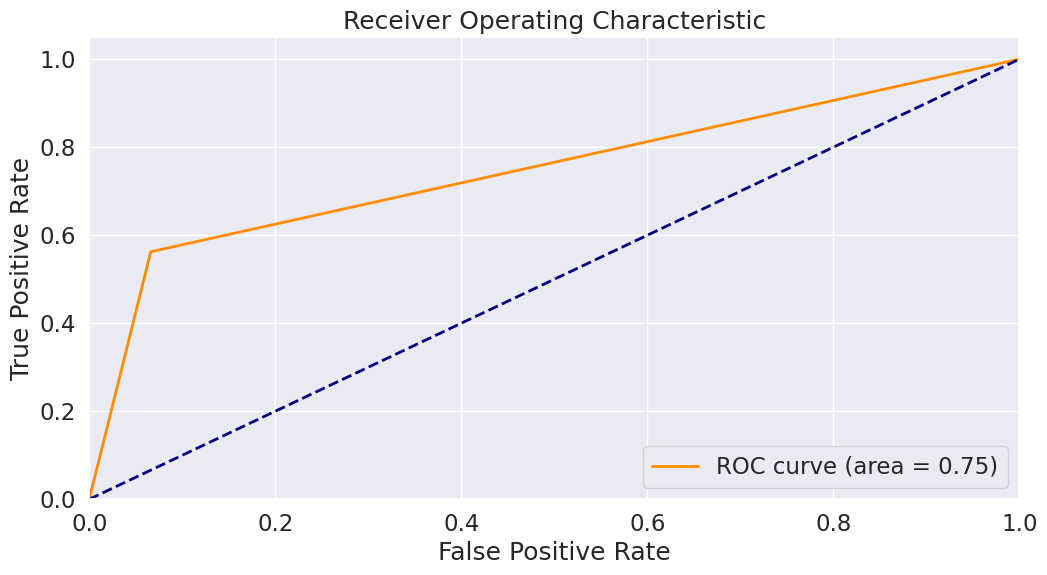

In [49]:
predicted_olid_2019_labels = test(model, test_olid_dataloader_2019)

predictions_olid_2019_labels = pd.concat([olid_2019_test_set.text, predicted_olid_2019_labels], axis = 1)
predictions_olid_2019_labels.label.replace(id_2_labels, inplace = True)
#predictions_olid_2019_labels.to_csv(args['results_data_directory'] + 'BERTWEET_OLID2019_Last_Hidden.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')

Predicting labels for 389 test sentences...


Evaluation iteration: 100%|██████████| 389/389 [00:23<00:00, 16.27it/s]



Calculating metrics...
Accuracy: 0.9331103678929766
F1 score: 0.9185595987531952
Precision: 0.9099581899385785
Recall : 0.9286215677736875
Matthews Correlation Coefficient: 0.8383720465118971

Precision of each class: [0.9676827  0.85223368]
Recall of each class: [0.93872462 0.91851852]
F1 score of each class: [0.95298373 0.88413547]
              precision    recall  f1-score   support

         NOT       0.97      0.94      0.95      2807
         OFF       0.85      0.92      0.88      1080

    accuracy                           0.93      3887
   macro avg       0.91      0.93      0.92      3887
weighted avg       0.94      0.93      0.93      3887



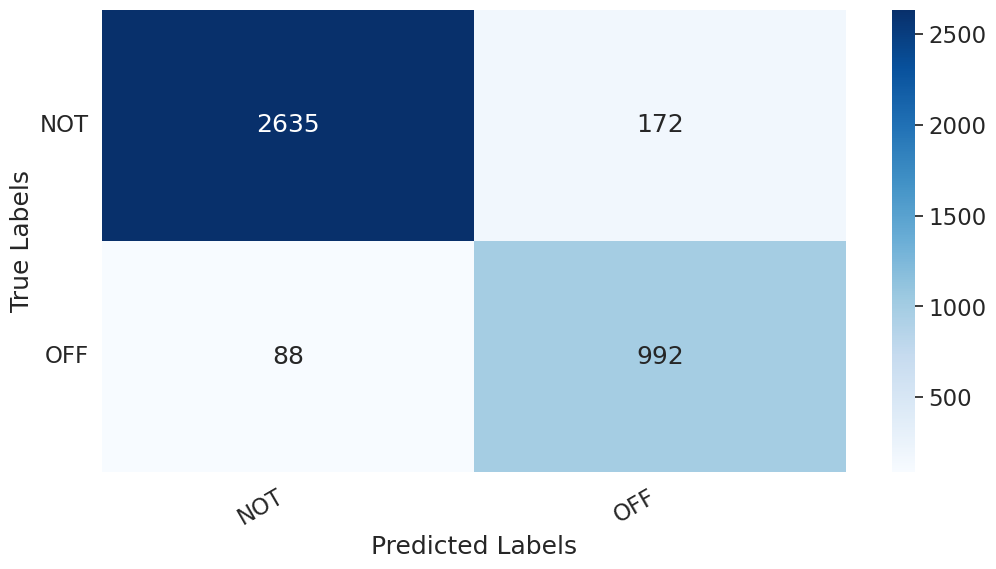

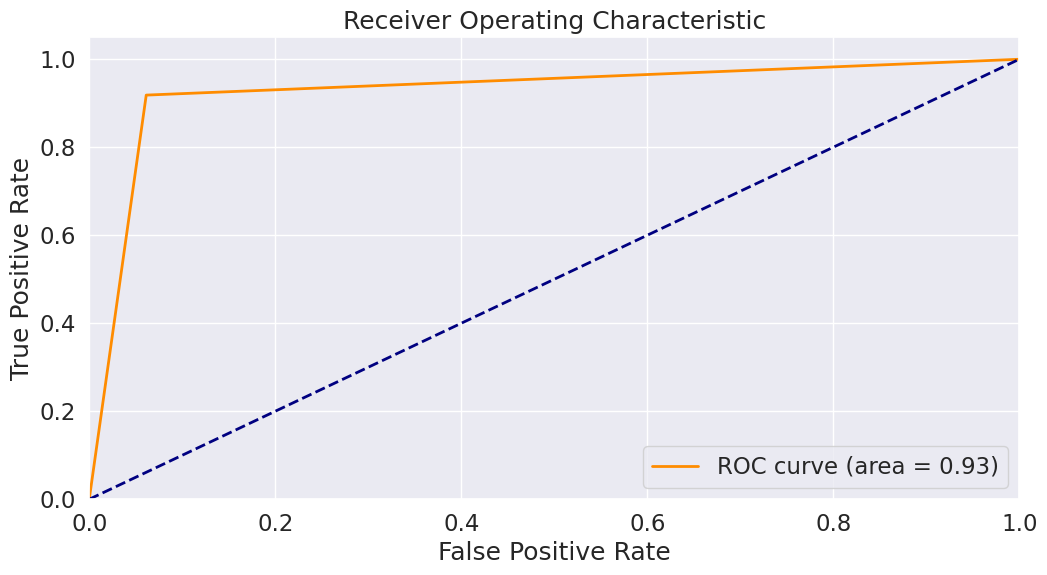

In [50]:
predicted_olid_2020_labels = test(model, test_olid_dataloader_2020)

predictions_olid_2020_labels = pd.concat([olid_2020_test_set.text, predicted_olid_2020_labels], axis = 1)
predictions_olid_2020_labels.label.replace(id_2_labels, inplace = True)
#predictions_olid_2020_labels.to_csv(args['results_data_directory'] + 'BERTWEET_OLID2020_Balanced_Last_Hidden.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')

Predicting labels for 475 test sentences...


Evaluation iteration: 100%|██████████| 475/475 [00:29<00:00, 16.30it/s]



Calculating metrics...
Accuracy: 0.9144722982936592
F1 score: 0.8939797914452505
Precision: 0.8921983493159387
Recall : 0.8958171958864984
Matthews Correlation Coefficient: 0.7880072356458366

Precision of each class: [0.94335192 0.84104478]
Recall of each class: [0.93784651 0.85378788]
F1 score of each class: [0.94059116 0.84736842]
              precision    recall  f1-score   support

         NOT       0.94      0.94      0.94      3427
         OFF       0.84      0.85      0.85      1320

    accuracy                           0.91      4747
   macro avg       0.89      0.90      0.89      4747
weighted avg       0.91      0.91      0.91      4747



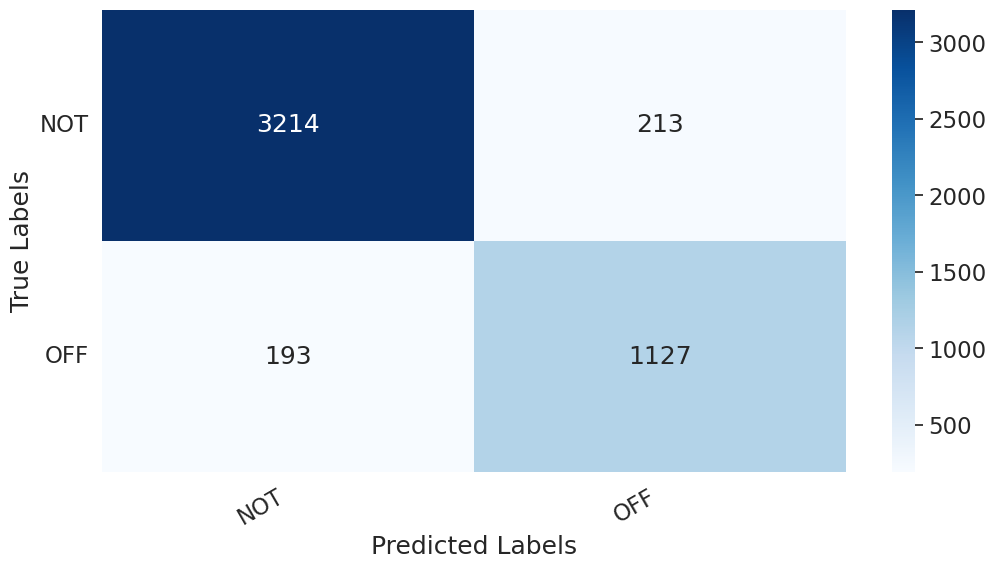

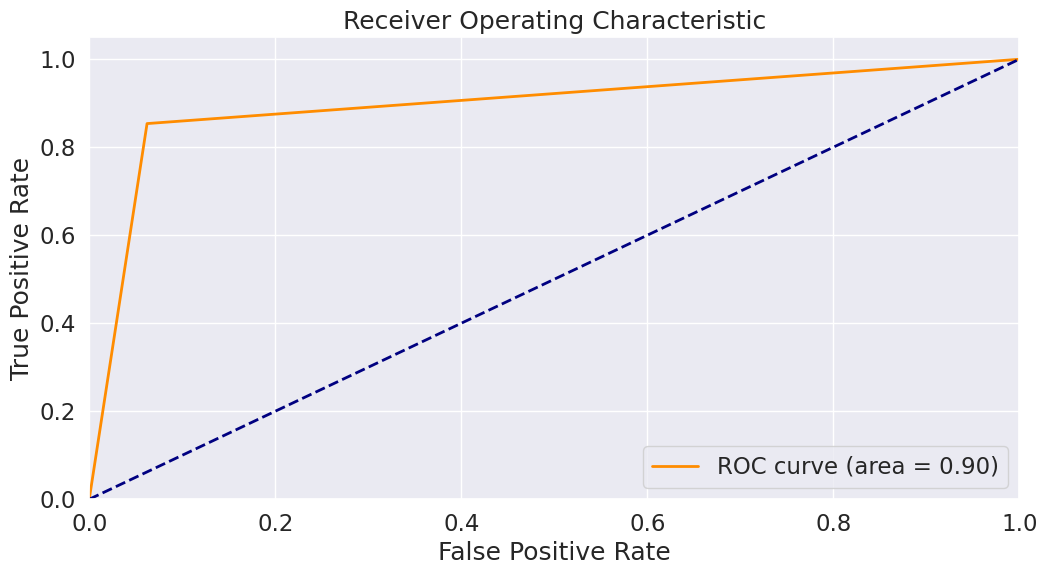

In [51]:
predicted_combined_labels = test(model, test_olid_dataloader_combined)

predictions_combined_labels = pd.concat([olid_combined_test_set.text, predicted_combined_labels], axis = 1)
predictions_combined_labels.label.replace(id_2_labels, inplace = True)
#predictions_combined_labels.to_csv(args['results_data_directory'] + 'test_predictions_ROBERTA10_Combined_Balanced_Last_Hidden.tsv', encoding = 'utf-8', index = False, header = True, sep ='\t')


**MAKE PREDICTIONS**

In [52]:
#loaded_model = load_saved_model(model, 'bert_classifier_concat_last_4_31419_balanced.pt', args['output_specific_model_dir'])

In [53]:
input_text = 'You are a stupid asshole!'

input_text = preprocessing(input_text)

encoded_review = tokenizer.encode_plus(text = input_text,
                                        text_pair = None,
                                        add_special_tokens = True,      # Add [CLS] and [SEP]
                                        max_length = 280,               # Max length to pad
                                        padding = 'max_length',         # Pad sentence according to max length  'max_length'
                                        truncation = True,              # Truncate the sentences
                                        return_token_type_ids = False,  # Do not return the ids of type tokens
                                        return_attention_mask = True,   # Return attention mask
                                        return_tensors = 'pt')          # Return PyTorch tensor

class_names = ['NOT', 'OFF']

input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {input_text}')
print(f'Label: {class_names[prediction]}')

Review text: you are a stupid asshole !
Label: NOT


**REFERENCE SOURCE CODES**

https://www.kaggle.com/code/rhtsingh/utilizing-transformer-representations-efficiently

https://github.com/avinashsai/BERT-Aspect
